In [1]:
from datetime import datetime
from pprint import pprint
import numpy as np
import pandas as pd
import scipy
import pickle

from one.api import ONE
from brainbox.io.one import SessionLoader, EphysSessionLoader
from iblatlas.atlas import AllenAtlas
from brainbox.io.one import SpikeSortingLoader

ba = AllenAtlas(res_um=10)

from brainbox.processing import bincount2D
import seaborn as sns

import matplotlib.pyplot as plt

from os.path import join
import os

from pathlib import Path
from psychedelic_functions import paths

path_dict = paths()

import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.colors as mcolors

mode = 'auto'  # sets mode for all queries (one.seach* methods)
one = ONE(mode=mode)

/home/openlab/anaconda3/envs/iblenv/lib/python3.10/site-packages/one/alf/files.py:10: FutureWarning: `one.alf.files` will be removed in version 3.0. Use `one.alf.path` instead.
  warnings.warn(


In [2]:
run -i fetch_dataset.py

Querying database...
Fetching protocol timings...


  0%|          | 0/29 [00:00<?, ?it/s]/home/openlab/Desktop/Jaime/Code/psychedelics/psyfun/io.py:103: UserWarning: No ALF data found for d77dd225-f7a9-4d01-996b-82c3ae73d56c, task 00 Reverting to raw task data
  warnings.warn(
/home/openlab/Desktop/Jaime/Code/psychedelics/psyfun/io.py:103: UserWarning: No ALF data found for d77dd225-f7a9-4d01-996b-82c3ae73d56c, task 01 Reverting to raw task data
  warnings.warn(
  3%|▎         | 1/29 [00:00<00:21,  1.31it/s]/home/openlab/Desktop/Jaime/Code/psychedelics/psyfun/io.py:103: UserWarning: No ALF data found for 86f743cd-ee0d-4ca5-a107-dca9a0cf3f7a, task 00 Reverting to raw task data
  warnings.warn(
/home/openlab/Desktop/Jaime/Code/psychedelics/psyfun/io.py:103: UserWarning: No ALF data found for 86f743cd-ee0d-4ca5-a107-dca9a0cf3f7a, task 01 Reverting to raw task data
  warnings.warn(
  7%|▋         | 2/29 [00:01<00:19,  1.39it/s]/home/openlab/Desktop/Jaime/Code/psychedelics/psyfun/io.py:103: UserWarning: No ALF data found for 4b398979-c54c-4

Fetching spike sorting data...


  0%|          | 0/48 [00:00<?, ?it/s]

Good clusters for PID 7da0f609...: 61 / 1610


  2%|▏         | 1/48 [00:08<06:45,  8.62s/it]

Good clusters for PID b33386fc...: 24 / 1541


KeyboardInterrupt: 

In [3]:
df_meta = pd.read_csv('./metadata/metadata.csv')
df_meta

rec_day        date  animal_ID  weight  stock_uL  saline_uL  \
0         1  07.12.2022  ZFM-05486    28.8      86.4      113.6   
1         1  08.12.2022  ZFM-05496    23.1      69.3      130.7   
2         2  15.12.2022  ZFM-05486    29.3      87.9      112.1   
3         2  15.12.2022  ZFM-05496    23.6      70.8      129.2   
4         1  24.01.2023  ZFM-05725    27.2      81.6      118.4   
5         1  25.01.2023  ZFM-05727    27.3      81.9      118.1   
6         2  31.01.2023  ZFM-05725    27.3      81.9      118.1   
7         2  01.02.2023  ZFM-05727    27.4      82.2      117.9   
8         3  07.02.2023  ZFM-05725    28.2      84.6      115.4   
9         3  08.02.2023  ZFM-05727    27.5      82.5      117.5   
10        1  22.03.2023  ZFM-05989    22.9      68.7      131.3   
11        1  21.03.2023  SQL-15020    21.6      64.8      135.2   
12        2  28.03.2023  SQL-15020    22.0      66.0      134.0   
13        3  05.04.2023  ZFM-05989    23.4      70.2      129.8   
14        3  04.04.2023  SQL-15020    22.7      68.1      131.9   
15        1  16.05.2023  ZFM-06187    29.9      89.7      110.3   
16        1  17.05.2023  ZFM-06048    30.7      92.1      107.9   
17        1  18.05.2023  ZFM-06047    30.1      90.3      109.7   
18        2  23.05.2023  ZFM-06187    31.0      93.0      107.0   
19        2  24.05.2023  ZFM-06048    30.9      92.7      107.3   
20        3  30.05.2023  ZFM-06187    30.9      92.7      107.3   
21        3  31.05.2023  ZFM-06048    31.0      93.0      107.0   
22        1  27.06.2023  ZFM-06301    22.8      68.4      131.6   
23        1  28.06.2023  ZFM-06373    29.5      88.5      111.5   
24        1  29.06.2023  ZFM-06296    29.0      87.0      113.0   
25        2  04.07.2023  ZFM-06301    22.2      66.6      133.4   
26        2  05.07.2023  ZFM-06373    29.6      88.8       11.2   
27        2  06.07.2023  ZFM-06296    22.0      66.0      134.0   
28        3  11.07.2023  ZFM-06301    22.6      67.8      132.2   
29        3  13.07.2023  ZFM-06296    28.9      86.7      113.3   

   administration_method  administration_time  alyx_registration  
0               Catheter              0:20:00              Error  
1               Catheter              0:18:15          Completed  
2               Catheter              0:19:33          Completed  
3               Catheter              0:18:20              Error  
4               Catheter              0:20:21          Completed  
5               Catheter              0:17:11          Completed  
6               Catheter              0:17:43          Completed  
7               Catheter              0:17:48          Completed  
8               Catheter              0:18:08          Completed  
9               Catheter              0:17:45          Completed  
10              Catheter              0:18:41          Completed  
11              Catheter              0:18:15          Completed  
12              Catheter              0:17:45          Completed  
13              Catheter              0:17:53          Completed  
14              Catheter              0:17:53          Completed  
15              Catheter              0:18:25          Completed  
16              Catheter              0:18:20              Error  
17              Catheter              0:19:06          Completed  
18              Catheter              0:17:56          Completed  
19              Catheter              0:17:57          Completed  
20              Catheter              0:18:14          Completed  
21              Catheter              0:17:51          Completed  
22              Catheter              0:20:40          Completed  
23              Catheter              0:17:48          Completed  
24              Catheter              0:19:16  No IMEC sync file  
25              Catheter              0:24:07          Completed  
26              Catheter              0:17:34          Completed  
27              Catheter              0:19:44     

In [4]:
df_timings = pd.read_csv('metadata/timings.csv')
df_timings

eid  spontaneous_start_00  \
0   d77dd225-f7a9-4d01-996b-82c3ae73d56c                     0   
1   86f743cd-ee0d-4ca5-a107-dca9a0cf3f7a                     0   
2   4b398979-c54c-498f-a3d4-b201c2285be5                     0   
3   6dc3fee9-6bfc-4daf-a70f-d726ac2fcfde                     0   
4   76bae405-b169-44ba-95db-b39342f21cf0                     0   
5   90b53484-ed3d-4f62-9dc7-64170e4941ba                     0   
6   50322fbb-5b93-46d7-9ca0-391fa30c966a                     0   
7   731a5f76-c4d6-4485-8584-7adeecdd6f3a                     0   
8   aff40fef-7ef3-4e7a-9451-f248e6d385db                     0   
9   8057374c-baf2-4391-b290-e88743d8981a                     0   
10  0bd26d4d-c1c1-4f59-af13-59d19b597ab6                     0   
11  53d8cb2f-3338-4bcd-81c4-6207b660eba3                     0   
12  1cbb24d0-2188-45dc-a116-e23a089c62b4                     0   
13  cbc72b2f-2906-497e-8df0-dfaf825ffb39                     0   
14  8868dff6-f4a6-4e84-b62c-24a0c97803c4                     0   
15  debe9833-5c26-4d9e-89ba-c63e07e1db10                     0   
16  7149e0fc-a52d-4e93-849c-edc22d54e7a5                     0   
17  a7a4a70f-57ae-4586-bb2d-37422deca541                     0   
18  58ca39c5-e27f-43c4-8516-2ccc4fe88042                     0   
19  e13d0e58-55c8-4787-a716-03549b3d0240                     0   
20  a1d9a3a6-873c-47fe-9350-6c87876a5669                     0   
21  a6b9f254-7682-47a4-9abd-753013c87c70                     0   
22  8dfd9963-25e5-4f63-8f91-5b27a5852628                     0   
23  8af06a79-cd95-446e-a57a-7c908d2dbe47                     0   
24  547a8c9a-be6b-4306-8a9a-c154096693ff                     0   
25  996f3585-b804-4a3d-878a-1c15d708962b                     0   
26  2583567d-cd2a-485a-8d79-85aa619e1ce2                     0   
27  98317b26-72d6-4805-9a68-beb7d37f955c                     0   
28  1bc4aea6-c6fa-4cb8-882f-ea1cc4a12667                     0   

    spontaneous_stop_00  rfm_start_00  rfm_stop_00  replay_start_00  \
0                   NaN           NaN          NaN              670   
1                   NaN           NaN          NaN              676   
2                   NaN           NaN          NaN              670   
3                   NaN           NaN          NaN              684   
4                   NaN           NaN          NaN              716   
5                   NaN           NaN          NaN              701   
6                   NaN           NaN          NaN              698   
7                   NaN           NaN          NaN              704   
8                   NaN           NaN          NaN              710   
9                   NaN           NaN          NaN              705   
10                  NaN           NaN          NaN              700   
11                  NaN           NaN          NaN              698   
12                  NaN           NaN          NaN              714   
13                  NaN           NaN          NaN              695   
14                  NaN           NaN          NaN              680   
15                  NaN           NaN          NaN              684   
16                  NaN           NaN          NaN              670   
17                  NaN           NaN          NaN              685   
18                  NaN           NaN          NaN              684   
19                  NaN           NaN          NaN              673   
20                  NaN           NaN          NaN              675   
21                  NaN           NaN          NaN              672   
22                  NaN           NaN          NaN              670   
23                  NaN           NaN          NaN              680   
24                  NaN           NaN          NaN              674   
25                  NaN           NaN          NaN              681   
26                  NaN           NaN          NaN              679   
27                  NaN           NaN          NaN              671 

In [5]:
df_spikes = pd.read_pickle('data/spike_times.pkl')
df_spikes

channels  depths  cluster_id   amp_max  \
uuids                                                                          
b11878eb-677b-4182-80e4-009d1fdd8d60        14   160.0          54  0.000341   
4dd832ff-f1bb-4849-9f80-99d1a3e3431f        14   160.0          55  0.000449   
074b0890-41fe-4133-975d-10be802914e0        16   180.0          67  0.000207   
ccebc984-f45c-4c7c-87ff-5953c66f342a        21   220.0          93  0.000240   
5b05d7dc-a06c-4796-a37e-f6268e145667        21   220.0         105  0.000210   
...                                        ...     ...         ...       ...   
cc770f2c-62a6-4535-a048-a6781454c6fe       114  1160.0        1507  0.000200   
93d93aed-6433-49b7-b041-b2f695eed9ea       129  1300.0        1517  0.000307   
f0ff19bd-1736-46d7-91c0-215e2deccf89       133  1340.0        1521  0.000228   
fb06fb0b-452d-41a8-8d5f-458caef93f1d       134  1360.0        1522  0.000171   
e5af8c2b-26c0-4212-9d16-339ba864c513       182  1840.0        1529  0.000210   

                                       amp_min  amp_median  amp_std_dB  \
uuids                                                                    
b11878eb-677b-4182-80e4-009d1fdd8d60  0.000081    0.000134    1.934957   
4dd832ff-f1bb-4849-9f80-99d1a3e3431f  0.000060    0.000156    2.527189   
074b0890-41fe-4133-975d-10be802914e0  0.000038    0.000100    2.396366   
ccebc984-f45c-4c7c-87ff-5953c66f342a  0.000095    0.000131    0.867436   
5b05d7dc-a06c-4796-a37e-f6268e145667  0.000057    0.000100    1.156440   
...                                        ...         ...         ...   
cc770f2c-62a6-4535-a048-a6781454c6fe  0.000052    0.000099    1.490393   
93d93aed-6433-49b7-b041-b2f695eed9ea  0.000054    0.000129    1.329069   
f0ff19bd-1736-46d7-91c0-215e2deccf89  0.000059    0.000133    1.171254   
fb06fb0b-452d-41a8-8d5f-458caef93f1d  0.000044    0.000082    1.285128   
e5af8c2b-26c0-4212-9d16-339ba864c513  0.000058    0.000094    1.408652   

                                      contamination  contamination_alt  \
uuids                                                                    
b11878eb-677b-4182-80e4-009d1fdd8d60       0.023501           0.024961   
4dd832ff-f1bb-4849-9f80-99d1a3e3431f       0.109517           0.114562   
074b0890-41fe-4133-975d-10be802914e0       1.107142           0.617039   
ccebc984-f45c-4c7c-87ff-5953c66f342a       1.163497           0.654950   
5b05d7dc-a06c-4796-a37e-f6268e145667       0.050251           0.044829   
...                                             ...                ...   
cc770f2c-62a6-4535-a048-a6781454c6fe       0.099829           0.085690   
93d93aed-6433-49b7-b041-b2f695eed9ea       0.000000           0.000000   
f0ff19bd-1736-46d7-91c0-215e2deccf89       0.000000           0.000000   
fb06fb0b-452d-41a8-8d5f-458caef93f1d       0.034871           0.031539   
e5af8c2b-26c0-4212-9d16-339ba864c513       0.002545           0.002369   

                                              drift  ...         z  acronym  \
uuids                                                ...                      
b11878eb-677b-4182-80e4-009d1fdd8d60   61823.820872  ... -0.004129      CA1   
4dd832ff-f1bb-4849-9f80-99d1a3e3431f   22514.550761  ... -0.004129      CA1   
074b0890-41fe-4133-975d-10be802914e0    5415.304123  ... -0.004110      CA1   
ccebc984-f45c-4c7c-87ff-5953c66f342a    2837.458662  ... -0.004070      CA1   
5b05d7dc-a06c-4796-a37e-f6268e145667   75105.848885  ... -0.004070      CA1   
...                                             ...  ...       ...      ...   
cc770f2c-62a6-4535-a048-a6781454c6fe  126929.802006  ... -0.003386       MD   
93d93aed-6433-49b7-b041-b2f695eed9ea   18081.898298  ... -0.003257       MD   
f0ff19bd-1736-46d7-91c0-215e2deccf89   22915.368490  ... -0.003218       MD   
fb06fb0b-452d-41a8-8d5f-458caef93f1d  192756.920681  ... -0.003200       MD   
e5af8c2b-26c0-4212-9d16-339ba864c513  698636.755721  ... -0.002772       LH   

                                      atlas

In [6]:
df_spikes.columns

Index(['channels', 'depths', 'cluster_id', 'amp_max', 'amp_min', 'amp_median',
       'amp_std_dB', 'contamination', 'contamination_alt', 'drift',
       'missed_spikes_est', 'noise_cutoff', 'presence_ratio',
       'presence_ratio_std', 'slidingRP_viol', 'spike_count', 'firing_rate',
       'label', 'ks2_label', 'x', 'y', 'z', 'acronym', 'atlas_id', 'axial_um',
       'lateral_um', 'rawInd', 'pid', 'eid', 'probe', 'spike_times'],
      dtype='object')

In [7]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

def power_law(x, alpha):
        return 1 / (x ** alpha)

def linear_function(x, alpha, b):
        return alpha * x + b

def exponential (x, alpha, b):
        return alpha * np.exp(b*x)

def load_good_units (pid):
        print ('pid:', pid)
        eid_timings = df_timings_spontaneous.loc[df_timings_spontaneous['eid']==eid]
        dir = Path (f'./Data/eids/{eid}/{pid}')
        dir.mkdir (parents=True, exist_ok=True)

        spikes_file = Path (f'./Data/eids/{eid}/{pid}/spikes.pkl')
        clusters_file = Path (f'./Data/eids/{eid}/{pid}/clusters.pkl')
        channels_file = Path (f'./Data/eids/{eid}/{pid}/channels.pkl')

        if spikes_file.exists() and clusters_file.exists() and channels_file.exists():
                with spikes_file.open('rb') as f:
                        print (f'Loading spikes from file at ./Data/eids/{eid}/{pid}/spikes.pkl')
                        spikes = pickle.load(f)
                with clusters_file.open('rb') as f:
                        print (f'Loading clusters from file at ./Data/eids/{eid}/{pid}/clusters.pkl')
                        clusters = pickle.load(f)
                with channels_file.open('rb') as f:
                        print (f'Loading channels from file at ./Data/eids/{eid}/{pid}/channels.pkl')        
                        channels = pickle.load(f)    
        else:
                print('No local files found, loading with SpikeSortingLoader')
                sl = SpikeSortingLoader(pid=pid, one=one, atlas=ba)
                spikes, clusters, channels = sl.load_spike_sorting()
                clusters = sl.merge_clusters(spikes, clusters, channels)
                with spikes_file.open('wb') as f:
                        print (f'Saving spikes to file at ./Data/eids/{eid}/{pid}/spikes.pkl')
                        pickle.dump(spikes, f)
                with clusters_file.open('wb') as f:
                        print (f'Saving clusters to file at ./Data/eids/{eid}/{pid}/clusters.pkl')
                        pickle.dump(clusters, f)
                with channels_file.open('wb') as f:
                        print (f'Saving channels to file at ./Data/eids/{eid}/{pid}/channels.pkl')        
                        pickle.dump(channels, f)

        print('Finished loading spikes, clusters and channels')

        # Only keep IBL good neurons
        spikes.times = spikes.times[np.isin(spikes.clusters, clusters.cluster_id[clusters.label == 1])]
        spikes.depths = spikes.depths[np.isin(spikes.clusters, clusters.cluster_id[clusters.label == 1])]
        spikes.clusters = spikes.clusters[np.isin(spikes.clusters, clusters.cluster_id[clusters.label == 1])]
        return spikes, clusters, channels

def plot_rasters (pid, spikes, clusters, channels, eid_timings):
        # Convert to mm
        spikes.depths = spikes.depths / 1000
        # Get spike raster
        iok = ~np.isnan(spikes.depths)
        R, times, depths = bincount2D(spikes.times[iok], spikes.depths[iok], xbin=0.01, ybin=0.02, weights=None)
        # %% Plot figure
        f, ax1 = plt.subplots(1, 1, figsize=(5, 2.5), dpi=300)
        ax1.imshow(R, aspect='auto', cmap='binary', vmin=0, vmax=np.std(R),
                extent=np.r_[times[[0, -1]], depths[[0, -1]]], origin='upper')
        ax1.set(ylim=[0, 4], ylabel='Depth (mm)')
        #ax1.set_title('Awake', color=colors['awake'], fontweight='bold')
        ax1.set(xticks=[ax1.get_xlim()[0] + 60, ax1.get_xlim()[0] + 660])
        ax1.text(ax1.get_xlim()[0] + 350, 4.3, '10 min', ha='center', va='center')
        ax1.axes.get_xaxis().set_visible(False)
        ax1.invert_yaxis()

        for i in np.arange(1, channels['acronym'].shape[0], 50):
                ax1.text(ax1.get_xlim()[-1]+50, channels['axial_um'][channels['acronym'].shape[0] - i] / 1000,
                channels['acronym'][i], fontsize=8)
        for key in eid_timings:
                print (key, ':', eid_timings[key].values[0])
                if key != 'eid':
                        ax1.axvline(eid_timings[key].values[0], color = "red", linewidth=0.2) # add linewidth parameter to make lines thinner
                        ax1.text(eid_timings[key].values[0], ax1.get_ylim()[0]-4, key, ha ='left', rotation = 45 ,color = "red", fontsize = 3) # adjust position and rotation of text
        plt.tight_layout()
        sns.despine(trim=True, offset=2)

        # plt.savefig(join(path_dict['fig_path'], 'example_raster.pdf'))
        start_index_00 = find_nearest(times, eid_timings['spontaneous_start_00'].values[0])
        stop_index_00 = find_nearest(times, eid_timings['spontaneous_stop_00'].values[0])
        start_index_01 = find_nearest(times, eid_timings['spontaneous_start_01'].values[0])
        stop_index_01 = find_nearest(times, eid_timings['spontaneous_stop_01'].values[0])
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

        spontaneous_activity_00 = R[:, start_index_00:stop_index_00]
        spontaneous_activity_01 = R[:, start_index_01:stop_index_01]


        im1 = ax1.imshow(spontaneous_activity_00, 
                aspect='auto', cmap='binary', vmin=0, vmax=np.std(R), 
                extent=np.r_[times[[start_index_00, stop_index_00-1]], depths[[0, -1]]], origin='upper')
        ax1.set_title('Spontaneous Activity #1')

        im2 = ax2.imshow(spontaneous_activity_01, 
                aspect='auto', cmap='binary', vmin=0, vmax=np.std(R), 
                extent=np.r_[times[[start_index_01, stop_index_01-1]], depths[[0, -1]]], origin='upper')
        ax2.set_title('Spontaneous Activity #2')

        # display the plot
        plt.show()
        plt.close()

def load_spontaneous_activity(spikes, eid_timings):
    # Convert AlfBunch to DataFrame
    spikes_df = pd.DataFrame(spikes)
    
    select_00 = (spikes_df.times >= eid_timings['spontaneous_start_00'].values[0]) & \
                (spikes_df.times <= eid_timings['spontaneous_stop_00'].values[0])
    select_01 = (spikes_df.times >= eid_timings['spontaneous_start_01'].values[0]) & \
                (spikes_df.times <= eid_timings['spontaneous_stop_01'].values[0])

    spontaneous_activity_00 = spikes_df.loc[select_00]
    spontaneous_activity_01 = spikes_df.loc[select_01]

    return spontaneous_activity_00, spontaneous_activity_01

In [8]:
def run_PCA(spontaneous_activity_00, spontaneous_activity_01):
        # perform PCA to get the first three components
        pca = PCA(n_components=20)
        pca_result_00 = pca.fit_transform(spontaneous_activity_00.T)  # transpose to make timestamp as row
        explained_variance_00 = pca.explained_variance_ratio_ # save the explained variance for 00

        pca_result_01 = pca.fit_transform(spontaneous_activity_01.T)  # transpose to make timestamp as row
        explained_variance_01 = pca.explained_variance_ratio_ # save the explained variance for 01

        fig = plt.figure(figsize = (16,8))


        # Create a 2x2 subplot grid
        fig, ax = plt.subplots(2, 2, figsize=(16,16))

        # create the first 3D subplot
        ax1 = fig.add_subplot(2, 2, 3, projection='3d')
        ax1.plot(pca_result_00[:,0], pca_result_00[:,1], pca_result_00[:,2], marker = 'o', alpha= 0.1)
        ax1.set_title('PCA trajectory of spontaneous activity 00 \n Pre-LSD')
        ax1.set_xlabel('PC1')
        ax1.set_ylabel('PC2')
        ax1.set_zlabel('PC3')

        # create the second 3D subplot
        ax2 = fig.add_subplot(2, 2, 4, projection='3d')
        ax2.plot(pca_result_01[:,0], pca_result_01[:,1], pca_result_01[:,2], marker = 'o', alpha= 0.1)
        ax2.set_title('PCA trajectory of spontaneous activity 01 \n Post-LSD')
        ax2.set_xlabel('PC1')
        ax2.set_ylabel('PC2')
        ax2.set_zlabel('PC3')

        # Create the first scree plot
        ax[0, 0].bar(np.arange(1,len(explained_variance_00)+1), explained_variance_00)
        ax[0, 0].set_title('Scree plot of spontaneous activity 00 \n Pre-LSD')
        ax[0, 0].set_xlabel('Principal Component')
        ax[0, 0].set_ylabel('Variance Explained (%)')

        # Create the second scree plot 
        ax[0, 1].bar(np.arange(1,len(explained_variance_01)+1), explained_variance_01)
        ax[0, 1].set_title('Scree plot of spontaneous activity 01 \n Post-LSD')
        ax[0, 1].set_xlabel('Principal Component')
        ax[0, 1].set_ylabel('Variance Explained (%)')

        plt.tight_layout()
        plt.show()
        plt.close()


        
        # Create plot
        fig, ax = plt.subplots(figsize=(10,8))

        # Add plots
        ax.plot(np.arange(1,len(explained_variance_00)+1), explained_variance_00, marker='o', label='Pre-LSD')
        ax.plot(np.arange(1,len(explained_variance_01)+1), explained_variance_01, marker='o', label='Post-LSD')

        # Set labels and title
        ax.set_title('Scree plot of spontaneous activity \n Pre-LSD vs Post-LSD')
        ax.set_xlabel('Principal Component')
        ax.set_ylabel('Variance Explained (%)')

        # Add legend to differentiate the lines
        ax.legend()

        # Show the plot
        plt.show()
        plt.close()


        # # Calculate power-law fit alpha for each dataset
        # alpha_00, _ = scipy.optimize.curve_fit(power_law, np.arange(1,len(explained_variance_00)+1), explained_variance_00) 
        # alpha_01, _ = scipy.optimize.curve_fit(power_law, np.arange(1,len(explained_variance_01)+1), explained_variance_01)


        # Calculate power-law fit alpha for each dataset
        [alpha_00, b00], _ = scipy.optimize.curve_fit(exponential, np.arange(1,len(explained_variance_00)+1), explained_variance_00) 
        [alpha_01, b01], _ = scipy.optimize.curve_fit(exponential, np.arange(1,len(explained_variance_01)+1), explained_variance_01)


        alphas = [[alpha_00, b00], [alpha_01, b01]]

        # x array for generating y_fit
        x_fit = np.arange(1, len(explained_variance_00)+1)

        # Generate prediction lines
        y_fit_00 = exponential(x_fit, alpha_00, b00)
        y_fit_01 = exponential(x_fit, alpha_01, b01)

        # Create the plot
        fig, ax = plt.subplots(figsize=(10,8))

        # Add original data plots
        ax.plot(x_fit, explained_variance_00, marker='o', label='Pre-LSD')
        ax.plot(x_fit, explained_variance_01, marker='o', label='Post-LSD')

        # Add prediction lines
        ax.plot(x_fit, y_fit_00, color='blue', label=f'Power-law fit Pre-LSD: alpha={alpha_00:.2f}')
        ax.plot(x_fit, y_fit_01, color='orange', label=f'Power-law fit Post-LSD: alpha={alpha_01:.2f}')

        # Set labels and title
        ax.set_title('Scree plot of spontaneous activity \n Pre-LSD vs Post-LSD')
        ax.set_xlabel('Principal Component')
        ax.set_ylabel('Variance Explained (%)')

        # Add legend to differentiate the lines
        ax.legend()

        # Show the plot
        plt.show()
        plt.close()
        return alphas, pca_result_00, explained_variance_00, pca_result_01, explained_variance_01

In [9]:
pid = '7da0f609-e432-4773-9d6a-40e06a3b206a'
sl = SpikeSortingLoader(pid=pid, one=one, atlas=ba)
spikes, clusters, channels = sl.load_spike_sorting()

In [10]:
for eid in df_timings_spontaneous['eid']:
    eid_timings = df_timings_spontaneous[df_timings_spontaneous['eid']==eid]
    for pid in one.eid2pid(eid)[0]:
        spikes, clusters, channels = load_good_units(pid)
        plot_rasters (pid, spikes, clusters, channels, eid_timings)
        spontaneous_activity_00, spontaneous_activity_01 = load_spontaneous_activity (spikes, eid_timings)
        run_PCA(spontaneous_activity_00, spontaneous_activity_01)
        break
    break


NameError: name 'df_timings_spontaneous' is not defined

In [ ]:
power_laws = []
per_session_pca = []
PCAs_per_eid = {}
for eid in df_timings_spontaneous['eid']:
    try:
        spontaneous_activity_00, spontaneous_activity_01 = load_rasters(eid)
        PCAs_per_eid[f'{eid}'] = run_PCA(spontaneous_activity_00, spontaneous_activity_01)
        power_laws.append(alphas)
        per_session_pca.append (alphas, pca_result_00, explained_variance_00, pca_result_01, explained_variance_01)
        break
    except AttributeError:
        print(f"An error occurred with {eid}. Skipping to the next one.")
        continue

NameError: name 'load_rasters' is not defined

ValueError: x and y must be the same size

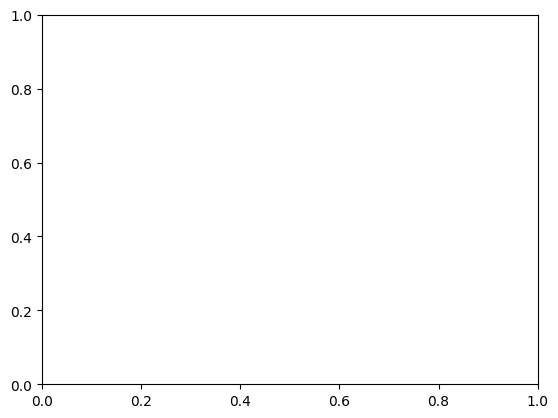

In [214]:
import matplotlib.pyplot as plt
import numpy as np

# Generate array for x coordinates
x_coords_pre = [1] * len(power_laws)  # Let's say 'Pre-LSD' points are at x=1
x_coords_post = [2] * len(power_laws)  # and 'Post-LSD' points are at x=2

# Extract 'Pre-LSD' and 'Post-LSD' points
pre_lsd = [entry[0] for entry in power_laws]
post_lsd = [entry[1] for entry in power_laws]

# Calculate the mean (average) values
mean_pre_lsd = np.mean(pre_lsd)
mean_post_lsd = np.mean(post_lsd)

# Create a new figure and axis
fig, ax = plt.subplots()

# Add scatter plots
ax.scatter(x_coords_pre, pre_lsd, label='Pre-LSD')
ax.scatter(x_coords_post, post_lsd, label='Post-LSD')

# Connect each pair of points with a line
for i in range(len(pre_lsd)):
    ax.plot([1, 2], [pre_lsd[i], post_lsd[i]], color='grey', linestyle='-', linewidth=1)

# Add average points to the plot
ax.scatter(1, mean_pre_lsd, color='red', label='Average Pre-LSD')
ax.scatter(2, mean_post_lsd, color='red', label='Average Post-LSD')

# Connect average points with a line
ax.plot([1, 2], [mean_pre_lsd, mean_post_lsd], color='red')

# Set title and labels
ax.set_title('Power law fit - Alpha estimates for each session')
ax.set_xlabel('Condition')
ax.set_xticks([1, 2])
ax.set_xticklabels(['Pre-LSD', 'Post-LSD'])
ax.set_ylabel('Alpha estimate')

# Add legend and show plot
ax.legend()
plt.show()


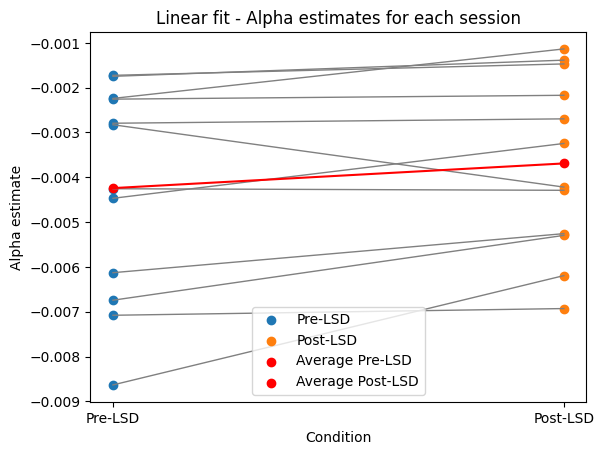

In [213]:
import matplotlib.pyplot as plt
import numpy as np

# Generate array for x coordinates
x_coords_pre = [1] * len(power_laws)  # Let's say 'Pre-LSD' points are at x=1
x_coords_post = [2] * len(power_laws)  # and 'Post-LSD' points are at x=2

# Extract 'Pre-LSD' and 'Post-LSD' points
pre_lsd = [entry[0][0] for entry in power_laws]
post_lsd = [entry[1][0] for entry in power_laws]

# Calculate the mean (average) values
mean_pre_lsd = np.mean(pre_lsd)
mean_post_lsd = np.mean(post_lsd)

# Create a new figure and axis
fig, ax = plt.subplots()

# Add scatter plots
ax.scatter(x_coords_pre, pre_lsd, label='Pre-LSD')
ax.scatter(x_coords_post, post_lsd, label='Post-LSD')

# Connect each pair of points with a line
for i in range(len(pre_lsd)):
    ax.plot([1, 2], [pre_lsd[i], post_lsd[i]], color='grey', linestyle='-', linewidth=1)

# Add average points to the plot
ax.scatter(1, mean_pre_lsd, color='red', label='Average Pre-LSD')
ax.scatter(2, mean_post_lsd, color='red', label='Average Post-LSD')

# Connect average points with a line
ax.plot([1, 2], [mean_pre_lsd, mean_post_lsd], color='red')

# Set title and labels
ax.set_title('Linear fit - Alpha estimates for each session')
ax.set_xlabel('Condition')
ax.set_xticks([1, 2])
ax.set_xticklabels(['Pre-LSD', 'Post-LSD'])
ax.set_ylabel('Alpha estimate')

# Add legend and show plot
ax.legend()
plt.show()


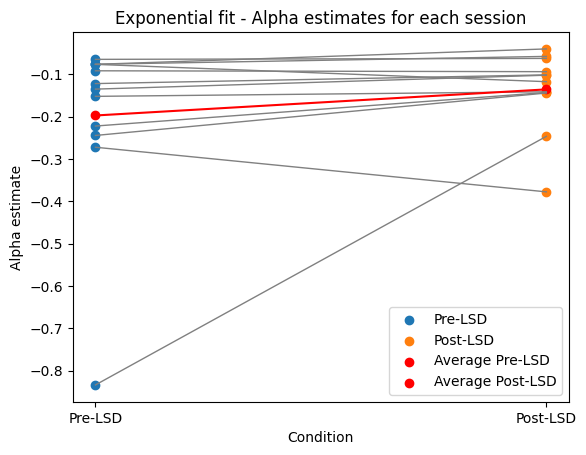

In [219]:
import matplotlib.pyplot as plt
import numpy as np

# Generate array for x coordinates
x_coords_pre = [1] * len(power_laws)  # Let's say 'Pre-LSD' points are at x=1
x_coords_post = [2] * len(power_laws)  # and 'Post-LSD' points are at x=2

# Extract 'Pre-LSD' and 'Post-LSD' points
pre_lsd = [entry[0][1] for entry in power_laws]
post_lsd = [entry[1][1] for entry in power_laws]

# Calculate the mean (average) values
mean_pre_lsd = np.mean(pre_lsd)
mean_post_lsd = np.mean(post_lsd)

# Create a new figure and axis
fig, ax = plt.subplots()

# Add scatter plots
ax.scatter(x_coords_pre, pre_lsd, label='Pre-LSD')
ax.scatter(x_coords_post, post_lsd, label='Post-LSD')

# Connect each pair of points with a line
for i in range(len(pre_lsd)):
    ax.plot([1, 2], [pre_lsd[i], post_lsd[i]], color='grey', linestyle='-', linewidth=1)

# Add average points to the plot
ax.scatter(1, mean_pre_lsd, color='red', label='Average Pre-LSD')
ax.scatter(2, mean_post_lsd, color='red', label='Average Post-LSD')

# Connect average points with a line
ax.plot([1, 2], [mean_pre_lsd, mean_post_lsd], color='red')

# Set title and labels
ax.set_title('Exponential fit - Alpha estimates for each session')
ax.set_xlabel('Condition')
ax.set_xticks([1, 2])
ax.set_xticklabels(['Pre-LSD', 'Post-LSD'])
ax.set_ylabel('Alpha estimate')

# Add legend and show plot
ax.legend()
plt.show()


In [4]:
def basic_ephys (pid):#, pname, session_path):

    # 1. Load in spikesorting data for pid
    ssl = SpikeSortingLoader(one=one, pid=pid, atlas=ba)
    spikes, clusters, channels = ssl.load_spike_sorting()
    print (spikes)
    clusters = ssl.merge_clusters(spikes, clusters, channels)
    # 2. Evaluate the number of good clusters
    # The spikesortingloader loads data for all clusters (both mua and good) detected by the spikesorter.
    # We can restrict to only the good clusters by finding the clusters with a label of 1
    good_cluster_idx = clusters['label'] == 1
    print (good_cluster_idx)
    clusters_good = {key:val[good_cluster_idx] for key, val in clusters.items()}

    all_clusters = clusters['label'].shape
    good_clusters = clusters_good['label'].shape
    print(f'Total no. of clusters: {all_clusters}')
    print(f'Number of good clusters: {good_clusters}')

    # 3. Find the location of clusters in brain
    # The location of the clusters can be found in the atlas_id (Allen CCF ids) or acronym attributes of the clusters object
    acronyms = clusters_good['acronym']
    unique_acronyms, count = np.unique(acronyms, return_counts=True)
    for a, c in zip(unique_acronyms, count):
        print(f'{a}: {c}')

    # 4. Compute the firing rate of each cluster
    # The firing rate of each cluster can be found in the firing rate atrribute of the clusters object
    firing_rate = clusters_good['firing_rate']

    # To show the interaction between the clusters and the spikes object we will show how you can compute
    # the firing rate from the data

    # To compute the firing rate we first need to compute the number of spikes detected for each cluster
    n_spikes = np.empty((clusters_good['cluster_id'].shape))
    # Loop over the cluster ids
    for i, c in enumerate(clusters_good['cluster_id']):
        # Find location where each cluster id is found in the spikes objects and get the sum
        cidx = np.sum(spikes['clusters'] == c)
        n_spikes[i] = cidx

    # To compute the firing rate we can divide the spike count by the total duration of the recording
    duration = np.max(spikes['times']) - np.min(spikes['times'])
    firing_rate_from_spikes = n_spikes / duration
    # Make sure that the values for firing rates are the same
    np.array_equal(firing_rate_from_spikes, firing_rate)

    # 5. Plot firing rate and brain locations
    clusters_good.keys()
    norm = colors.Normalize(vmin=np.min(firing_rate), vmax=np.max(firing_rate), clip=True)
    mapper = cm.ScalarMappable(norm=norm, cmap=cm.get_cmap('hot'))
    firing_rate_cols = mapper.to_rgba(firing_rate)
    fig, axs = plt.subplots(1, 2)
    # Plot the brain regions through which the channels on the insertion pass
    plot_brain_regions(channels['atlas_id'], channel_depths=channels['axial_um'], ax=axs[0])
    # Plot scatter plot of cluster depths vs cluster amp with firing rate encoded in colour
    # Map firing rate values to colours
    norm = colors.Normalize(vmin=np.min(firing_rate), vmax=np.max(firing_rate), clip=True)
    mapper = cm.ScalarMappable(norm=norm, cmap=cm.get_cmap('hot'))
    firing_rate_cols = mapper.to_rgba(firing_rate)
    axs[1].scatter(clusters_good['amp_median'] * 1e6, clusters_good['depths'], c=firing_rate_cols)
    axs[1].set_xlabel('Amps (uV)')
    axs[1].get_yaxis().set_visible(False)
    cbar = fig.colorbar(mapper, ax=axs[1])
    cbar.set_label('Firing rate (Hz)')
    plt.show()
    plt.close(fig)
    return {a: c for a, c in zip(unique_acronyms, count)}


In [5]:
import pandas as pd

# Assuming neurons_per_area is your dictionary

# Create a new dictionary where areas will be the keys
areas_dict = {}

for session, areas in neurons_per_area.items():
    for area, neuron_count in areas.items():
        if area not in areas_dict:
            # Create a new dictionary for each new area, with session ids as keys
            areas_dict[area] = {}
        areas_dict[area][session] = neuron_count

# Convert the dictionary to a DataFrame
df = pd.DataFrame(areas_dict).T.fillna(0)
df = df.sort_index()
df = df[df.apply(lambda row: np.count_nonzero(row) >= 3, axis=1)]

print (df)

# Create the heatmap
fig, axs = plt.subplots(1, 2, figsize=(20,20))  # Adjust the size as needed.
heatmap = axs[0].imshow(df, cmap='hot', interpolation='nearest')

# Add labels to the axes
axs[0].set_xticks(range(df.shape[1]))
axs[0].set_xticklabels(df.columns, fontsize=10, rotation=90)
axs[0].set_yticks(range(df.shape[0]))
axs[0].set_yticklabels(df.index, fontsize=10)

# Add a colorbar
cbar = fig.colorbar(heatmap, ax=axs[0], fraction=0.046, pad=0.04)
cbar.set_label('Number of neurons')

# Label axes
axs[0].set_xlabel('Session ID')
axs[0].set_ylabel('Area')

# Create the number map
numbermap = axs[1].imshow(df, cmap='Greys', interpolation='nearest')

# Add labels to the axes
axs[1].set_xticks(range(df.shape[1]))
axs[1].set_xticklabels(df.columns, fontsize=10, rotation=90)
axs[1].set_yticks(range(df.shape[0]))
axs[1].set_yticklabels(df.index, fontsize=10)

# Add the neuron counts as text
for i in range(df.shape[0]):
    for j in range(df.shape[1]):
        axs[1].text(j, i, int(df.iloc[i, j]), ha="center", va="center", color="black", fontsize = 6)

# Label axes
axs[1].set_xlabel('Session ID')
axs[1].set_ylabel('Area')

# Show the plot
plt.tight_layout()
plt.show()

NameError: name 'neurons_per_area' is not defined

In [ ]:
dataset = 'spikes.times.npy'
brain_acronym = 'MO'
psychedelic_insertions = one.search_insertions(project=['psychedelics'])
psychedelic_insertions_spikes = one.search_insertions(project=['psychedelics'], datasets=dataset)
psychedelic_insertions_spikes_area = one.search_insertions(project=['psychedelics'], datasets=dataset, atlas_acronym=brain_acronym)

print(f'{len(psychedelic_insertions)-1} insertions in psychedelic project, of which \n{len(psychedelic_insertions_spikes)-1} have a spikes.times.npy file, \n{len(psychedelic_insertions_spikes_area)-1} with areas containing {brain_acronym} in their acronym')
datasets_loaded = {}
neurons_per_area = {}
errored_sessions = []
for pid in psychedelic_insertions_spikes:
    try:
        neurons_per_area[pid] = basic_ephys (pid)    
    except Exception as e:
        errored_sessions.append(pid)
        continue
    # ssl = SpikeSortingLoader(one=one, pid=pid)
    # channels = ssl.load_channels()
    # spikes, clusters, channels = ssl.load_spike_sorting()
    # print (spikes)
#

In [50]:
np.log2(0)

/tmp/ipykernel_601065/2251961259.py:1: RuntimeWarning: divide by zero encountered in log2
  np.log2(0)


-inf

In [19]:
#From Davide
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from psychedelic_functions import fetch_spikes, _get_binned_spike_counts
from psychedelic_functions import combine_regions
from scipy.stats import entropy

df_spikes = pd.read_pickle('data/spike_times.pkl')

df_timings = pd.read_csv('metadata/timings.csv').set_index('eid')
df_timings = df_timings.dropna()
# Keep only spikes from experiments with have valid timings
# df_timings_spontaneous = df_timings[df_timings['spontaneous_start_01'].notna()]
# df_timings_spontaneous = df_timings_spontaneous[df_timings_spontaneous['spontaneous_start_00'].notna()]
# df_timings_spontaneous = df_timings_spontaneous[df_timings_spontaneous['replay_stop_00'].notna()]
# df_timings_spontaneous = df_timings_spontaneous[df_timings_spontaneous['replay_stop_01'].notna()]
# df_timings_spontaneous
df_spikes = df_spikes[np.isin(df_spikes['eid'], df_timings.index)]

In [20]:
df_timings

spontaneous_start_00  \
eid                                                          
d77dd225-f7a9-4d01-996b-82c3ae73d56c                   0.0   
86f743cd-ee0d-4ca5-a107-dca9a0cf3f7a                   0.0   
4b398979-c54c-498f-a3d4-b201c2285be5                   0.0   
6dc3fee9-6bfc-4daf-a70f-d726ac2fcfde                   0.0   
76bae405-b169-44ba-95db-b39342f21cf0                   0.0   
90b53484-ed3d-4f62-9dc7-64170e4941ba                   0.0   
50322fbb-5b93-46d7-9ca0-391fa30c966a                   0.0   
731a5f76-c4d6-4485-8584-7adeecdd6f3a                   0.0   
aff40fef-7ef3-4e7a-9451-f248e6d385db                   0.0   
8057374c-baf2-4391-b290-e88743d8981a                   0.0   
0bd26d4d-c1c1-4f59-af13-59d19b597ab6                   0.0   
53d8cb2f-3338-4bcd-81c4-6207b660eba3                   0.0   
1cbb24d0-2188-45dc-a116-e23a089c62b4                   0.0   
cbc72b2f-2906-497e-8df0-dfaf825ffb39                   0.0   
8868dff6-f4a6-4e84-b62c-24a0c97803c4                   0.0   
debe9833-5c26-4d9e-89ba-c63e07e1db10                   0.0   
7149e0fc-a52d-4e93-849c-edc22d54e7a5                   0.0   
a7a4a70f-57ae-4586-bb2d-37422deca541                   0.0   
58ca39c5-e27f-43c4-8516-2ccc4fe88042                   0.0   
e13d0e58-55c8-4787-a716-03549b3d0240                   0.0   
a6b9f254-7682-47a4-9abd-753013c87c70                   0.0   
8dfd9963-25e5-4f63-8f91-5b27a5852628                   0.0   
996f3585-b804-4a3d-878a-1c15d708962b                   0.0   
2583567d-cd2a-485a-8d79-85aa619e1ce2                   0.0   

                                      spontaneous_stop_00  rfm_start_00  \
eid                                                                       
d77dd225-f7a9-4d01-996b-82c3ae73d56c                370.0         370.0   
86f743cd-ee0d-4ca5-a107-dca9a0cf3f7a                376.0         376.0   
4b398979-c54c-498f-a3d4-b201c2285be5                370.0         370.0   
6dc3fee9-6bfc-4daf-a70f-d726ac2fcfde                384.0         384.0   
76bae405-b169-44ba-95db-b39342f21cf0                416.0         416.0   
90b53484-ed3d-4f62-9dc7-64170e4941ba                401.0         401.0   
50322fbb-5b93-46d7-9ca0-391fa30c966a                398.0         398.0   
731a5f76-c4d6-4485-8584-7adeecdd6f3a                404.0         404.0   
aff40fef-7ef3-4e7a-9451-f248e6d385db                410.0         410.0   
8057374c-baf2-4391-b290-e88743d8981a                405.0         405.0   
0bd26d4d-c1c1-4f59-af13-59d19b597ab6                400.0         400.0   
53d8cb2f-3338-4bcd-81c4-6207b660eba3                398.0         398.0   
1cbb24d0-2188-45dc-a116-e23a089c62b4                414.0         414.0   
cbc72b2f-2906-497e-8df0-dfaf825ffb39                395.0         395.0   
8868dff6-f4a6-4e84-b62c-24a0c97803c4                380.0         380.0   
debe9833-5c26-4d9e-89ba-c63e07e1db10                384.0         384.0   
7149e0fc-a52d-4e93-849c-edc22d54e7a5                370.0         370.0   
a7a4a70f-57ae-4586-bb2d-37422deca541                385.0         385.0   
58ca39c5-e27f-43c4-8516-2ccc4fe88042                384.0         384.0   
e13d0e58-55c8-4787-a716-03549b3d0240                373.0         373.0   
a6b9f254-7682-47a4-9abd-753013c87c70                372.0         372.0   
8dfd9963-25e5-4f63-8f91-5b27a5852628                370.0         370.0   
996f3585-b804-4a3d-878a-1c15d708962b                381.0         381.0   
2583567d-cd2a-485a-8d79-85aa619e1ce2                379.0         379.0   

                                      rfm_stop_00  replay_start_00  \
eid                                                                  
d77dd225-f7a9-4d01-996b-82c3ae73d56c        670.0            670.0   
86f743cd-ee0d-4ca5-a107-dca9a0cf3f7a        676.0            676.0   
4b398979-c54c-498f-a3d4-b201c2285be5        670.0            670.0   
6dc3fee9-6bfc-4daf-a70f-d726ac2fcfde        684.0            684.0   
76bae405-b169-44ba-95db-b39342f21cf0        716.0     

/tmp/ipykernel_1588510/2124977140.py:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for idx, session in df_spikes.groupby(['eid']):
/tmp/ipykernel_1588510/2124977140.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


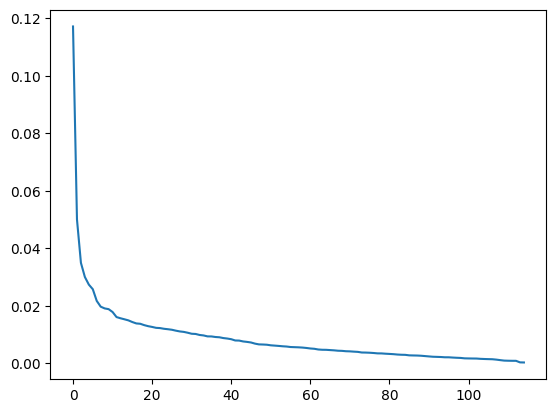

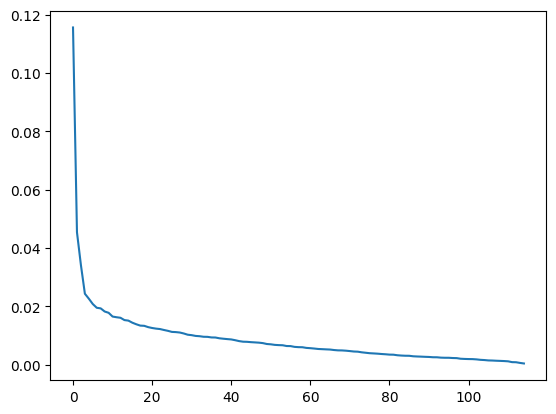

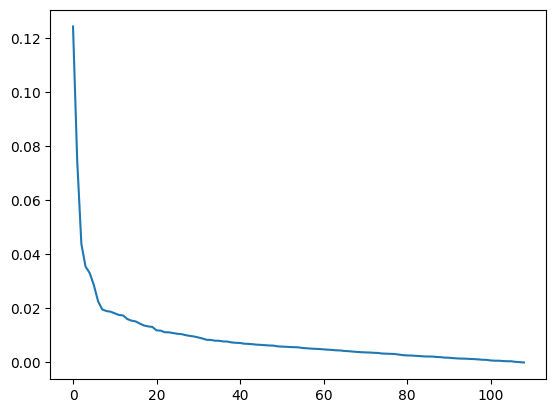

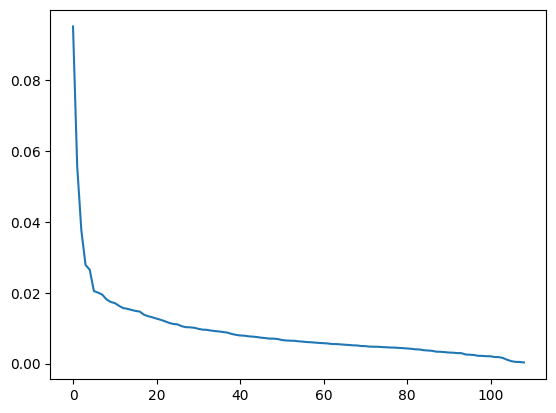

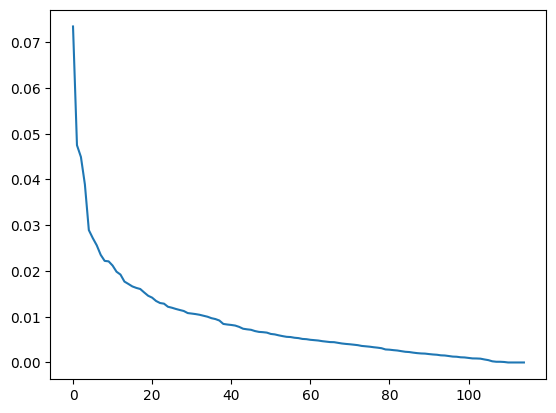

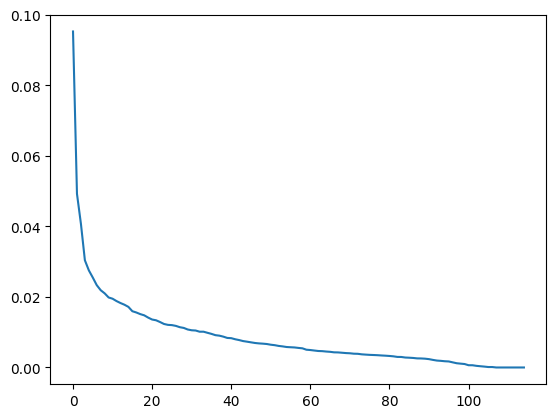

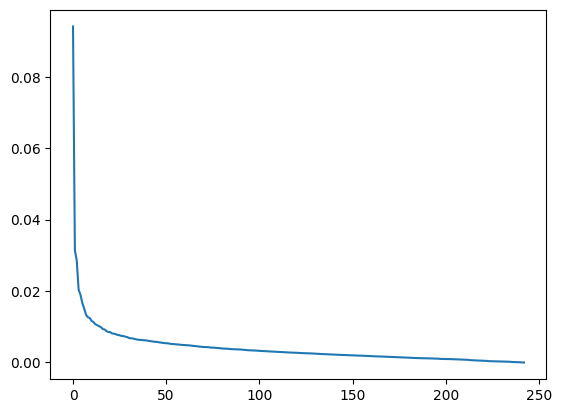

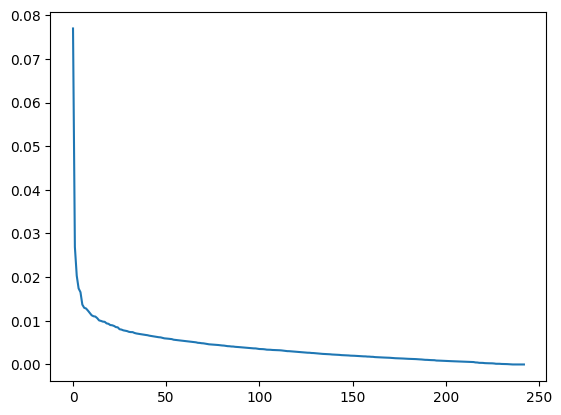

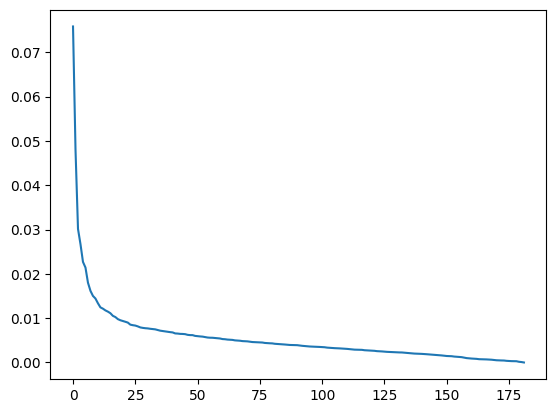

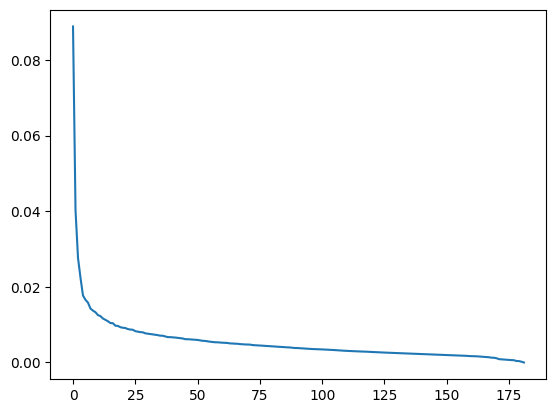

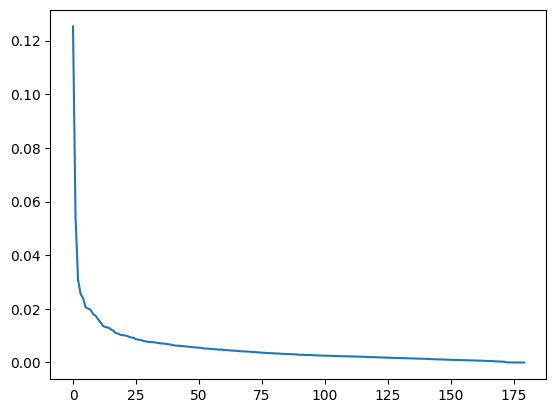

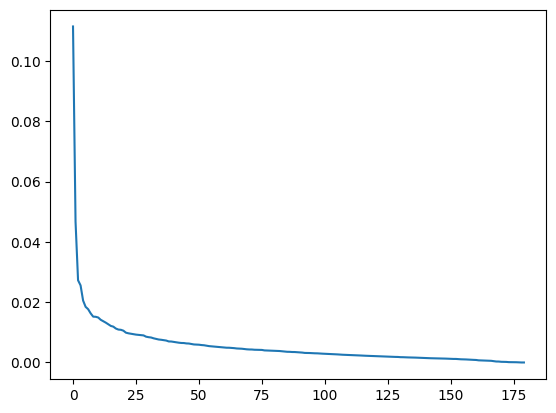

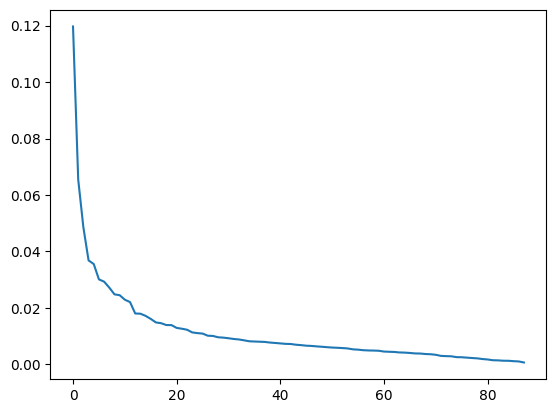

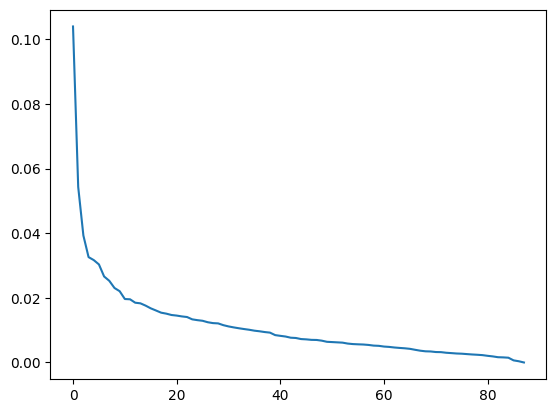

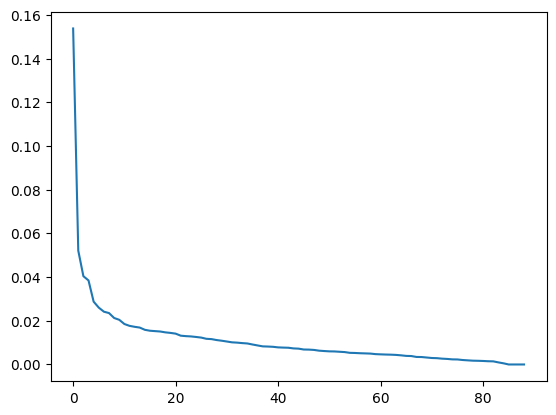

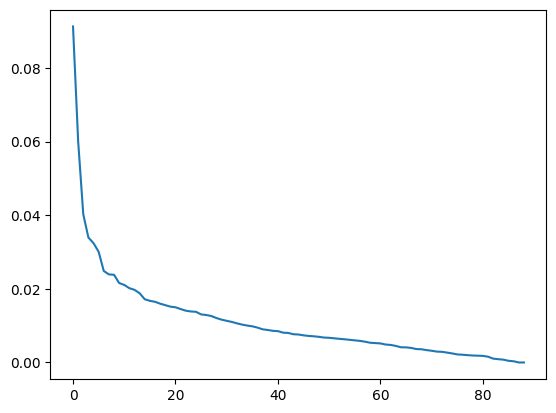

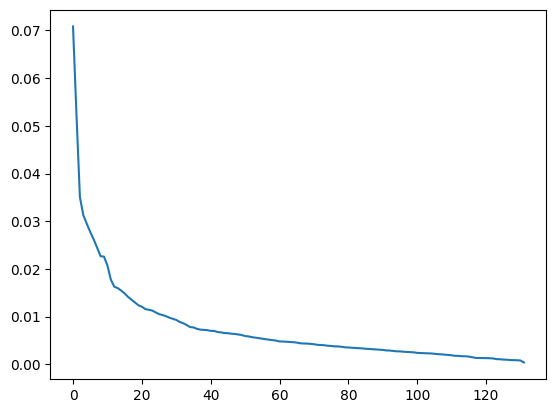

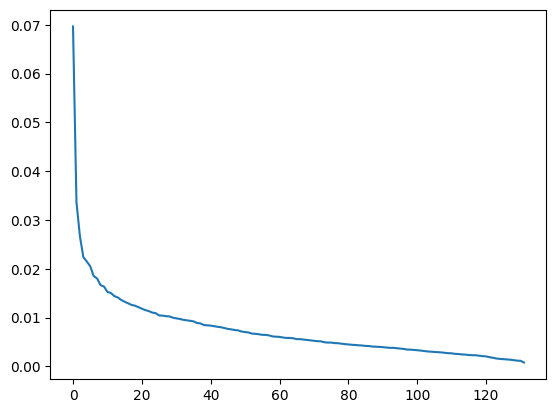

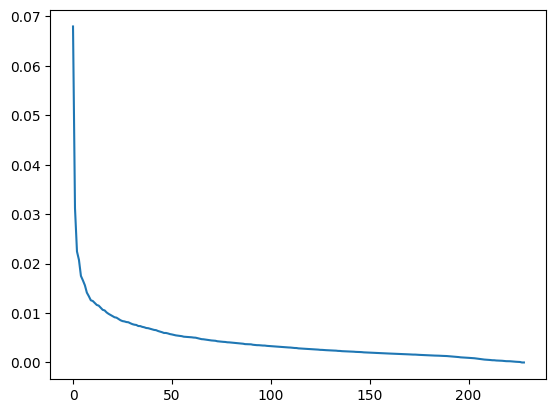

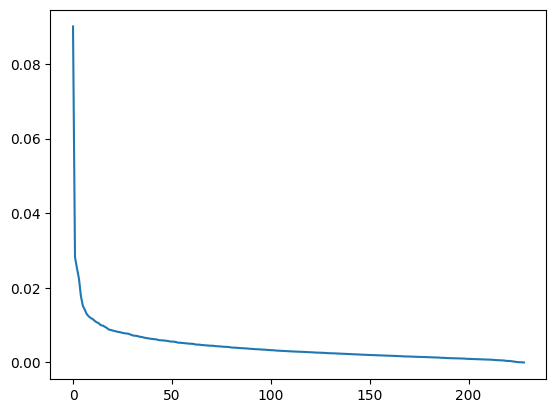

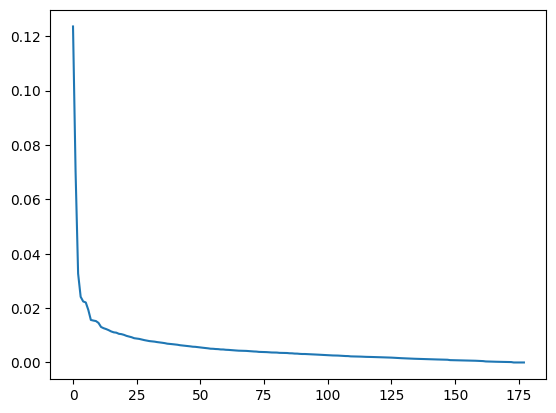

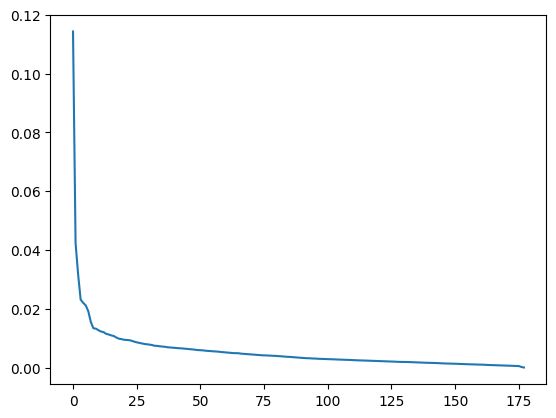

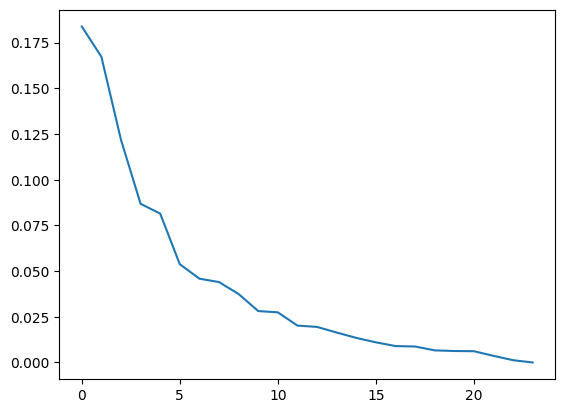

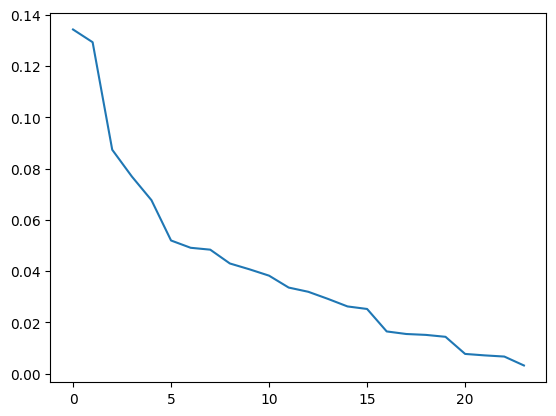

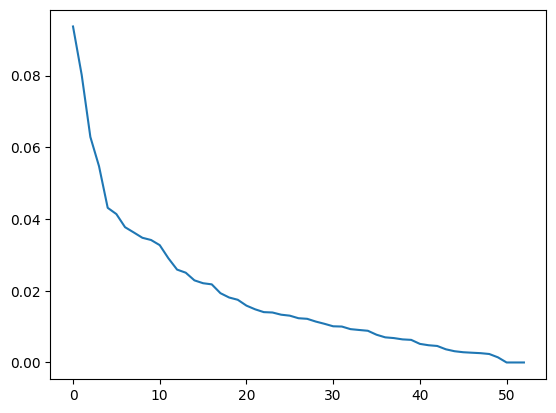

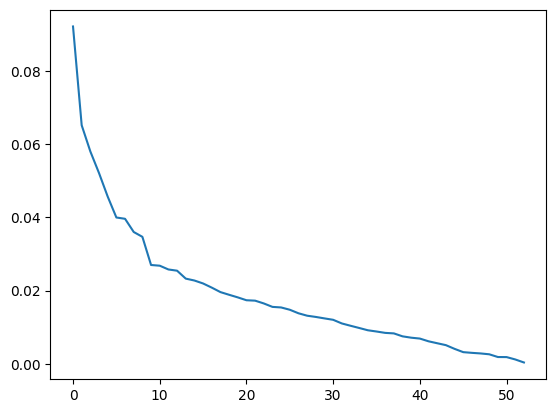

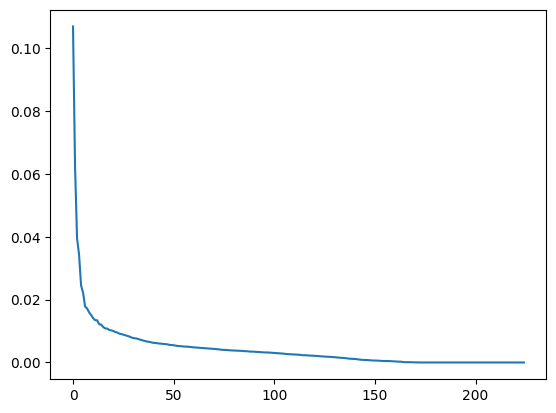

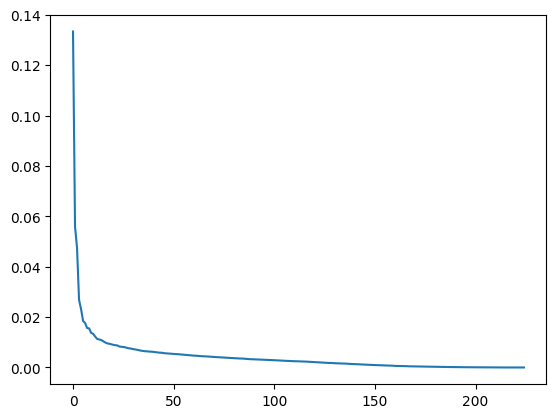

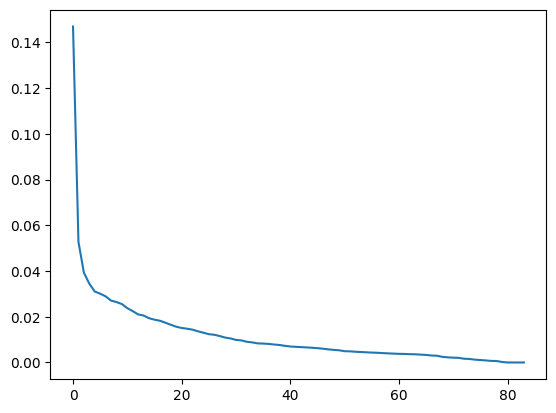

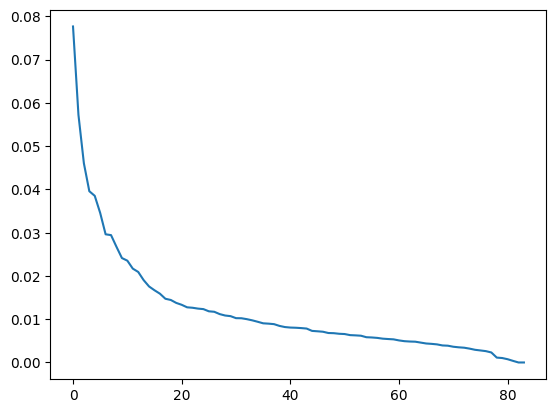

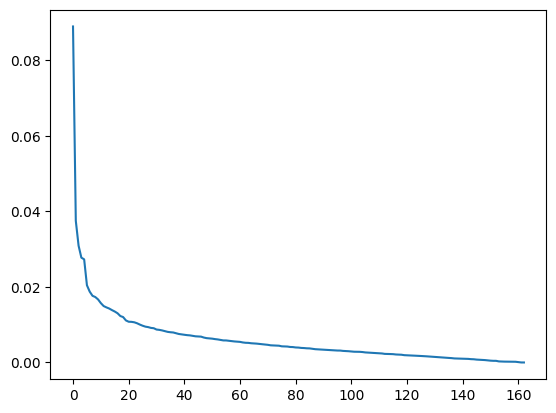

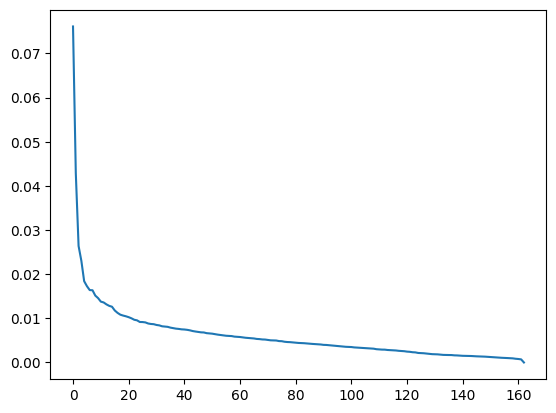

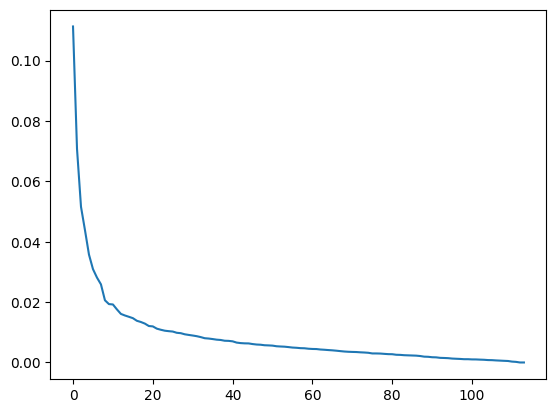

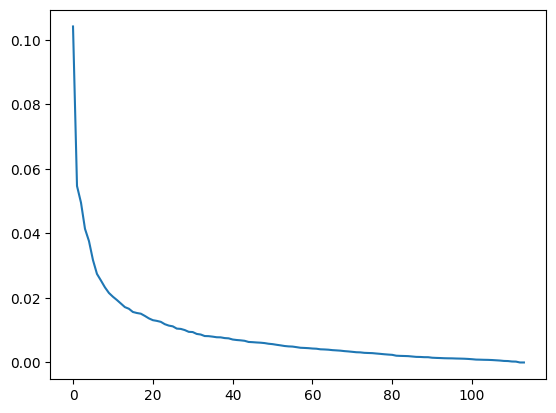

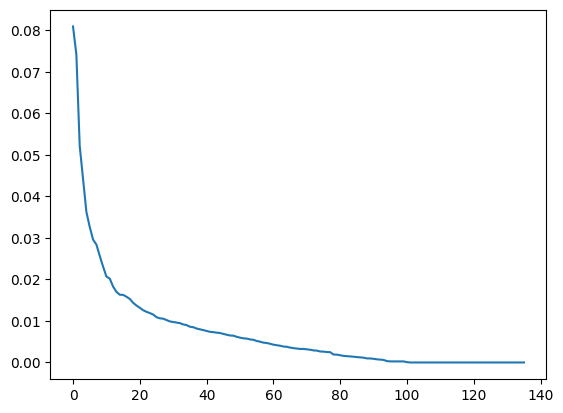

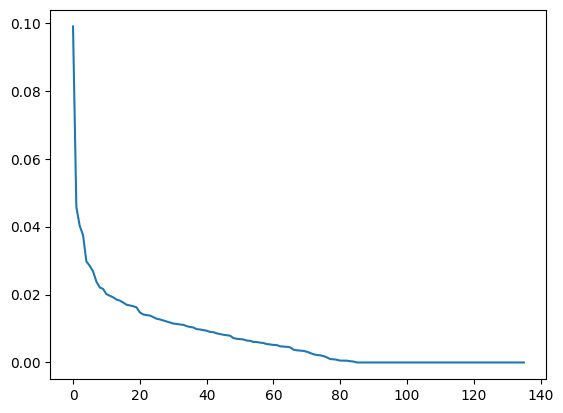

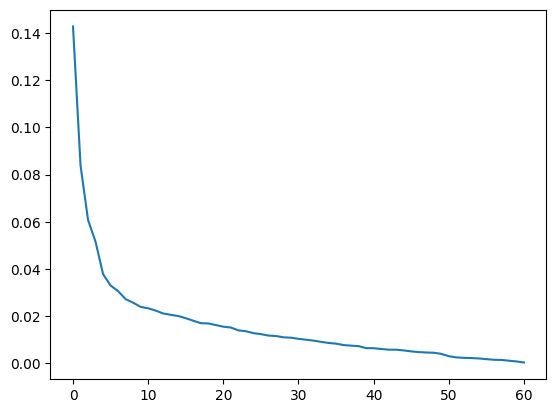

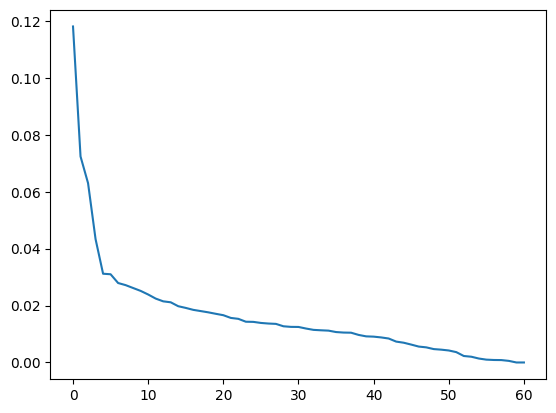

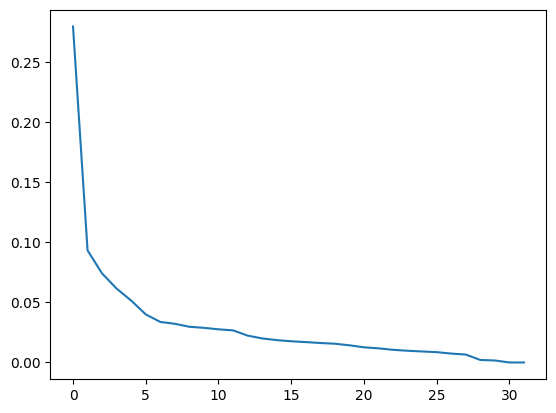

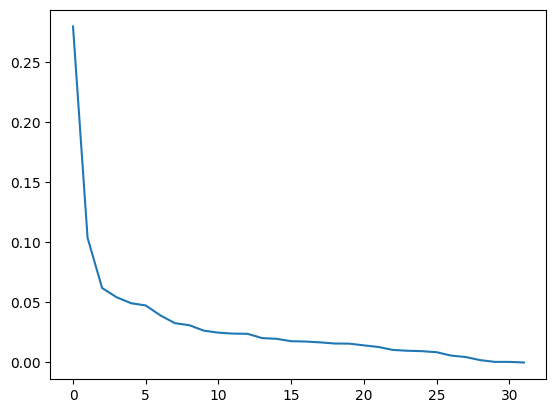

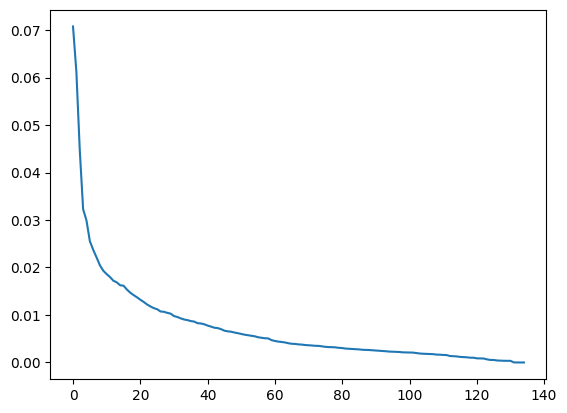

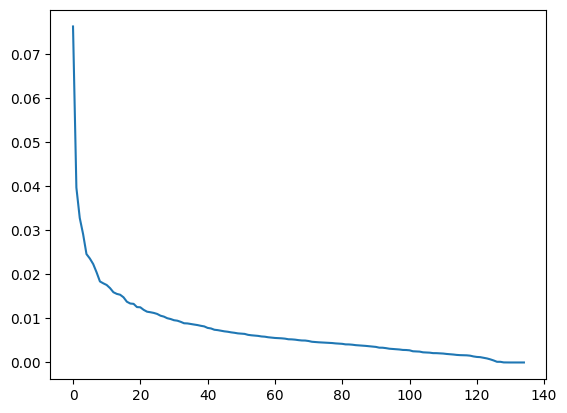

In [21]:
def exponential (x, tau):
        return  np.exp(-x/tau)
variances = []
for idx, session in df_spikes.groupby(['eid']):
    if len(session)<20:
        continue
    dict_var = {'eid': idx}
    for epoch in [0,1]:
        # Deicde on time range to consider (& bin width for spike counts)
        args = {'start': f'spontaneous_start_0{epoch}', 'stop': f'spontaneous_stop_0{epoch}'}

        # Get those timings from the timings dataframe
        for event in args.values():
                session[event] = session['eid'].apply(lambda x: df_timings.loc[x][event])
        # Add dt arg to args dict
        args['dt'] = 0.1
        fig, ax = plt.subplots()
        # Get binned counts for the desired interval for each unit
        sp00_spike_counts = session.apply(_get_binned_spike_counts, **args, axis='columns')
        X = np.column_stack(sp00_spike_counts)  # convert it to 2D array w/ units as columns
        # Min-max normalize
        scaler = MinMaxScaler()
        X_norm = scaler.fit_transform(X)
        # PCA
        pca = PCA()
        pca.fit(X_norm)
        # Skree plot
        ax.plot(pca.explained_variance_ratio_)
        [tau], _ = scipy.optimize.curve_fit(exponential, np.arange(pca.n_components_), pca.explained_variance_ratio_/pca.explained_variance_ratio_[0])

        dict_var[f'pc1_{epoch}'] = pca.explained_variance_ratio_[0]
        dict_var[f'pcs_{epoch}'] = pca.explained_variance_ratio_
        dict_var[f'tau_{epoch}'] = tau
        dict_var[f'ngsc_{epoch}'] = entropy(pca.explained_variance_ratio_) / np.log2(pca.n_components_)
    variances.append (dict_var)

In [22]:
from scipy.stats import entropy
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

def exponential(x, tau):
    return np.exp(-x/tau)

variances = []

# List of tuples (time after start, time after end) for each time window
time_windows = [(300, 900), (600, 1200)]  # Add more tuples as necessary
five_min = 300

for idx, session in df_spikes.groupby(['eid']):
    print(idx)
    if len(session) < 20:
        continue
    spontaneous_00_start = df_timings.loc[idx, f'spontaneous_start_00']
    spontaneous_00_stop  = df_timings.loc[idx, f'spontaneous_stop_00']
    spontaneous_01_start = df_timings.loc[idx, f'spontaneous_start_01']
    spontaneous_01_stop  = df_timings.loc[idx, f'spontaneous_stop_01']

    task_replay_00_start = df_timings.loc[idx, f'rfm_stop_00']      #USING RFM_STOP INSTEAD OF REPLAY_START
    task_replay_00_stop  = df_timings.loc[idx, f'replay_stop_00']
    task_replay_01_start = df_timings.loc[idx, f'rfm_stop_01']      #USING RFM_STOP INSTEAD OF REPLAY_START
    task_replay_01_stop  = df_timings.loc[idx, f'replay_stop_01']
   
    post_LSD_00_start    = df_timings.loc[idx, 'admin_time'] + 0*(five_min)
    post_LSD_00_stop     = df_timings.loc[idx, 'admin_time'] + 1*(five_min)
    post_LSD_01_start    = df_timings.loc[idx, 'admin_time'] + 1*(five_min)
    post_LSD_01_stop     = df_timings.loc[idx, 'admin_time'] + 2*(five_min)
    post_LSD_02_start    = df_timings.loc[idx, 'admin_time'] + 2*(five_min)
    post_LSD_02_stop     = df_timings.loc[idx, 'admin_time'] + 3*(five_min)
    post_LSD_03_start    = df_timings.loc[idx, 'admin_time'] + 3*(five_min)
    post_LSD_03_stop     = df_timings.loc[idx, 'admin_time'] + 4*(five_min)
    post_LSD_04_start    = df_timings.loc[idx, 'admin_time'] + 4*(five_min)
    post_LSD_04_stop     = df_timings.loc[idx, 'admin_time'] + 5*(five_min)
    post_LSD_05_start    = df_timings.loc[idx, 'admin_time'] + 5*(five_min)
    post_LSD_05_stop     = df_timings.loc[idx, 'admin_time'] + 6*(five_min)

    comparisons = {
        'First spontaneous activity vs. First task replay'                       : [[spontaneous_00_start, spontaneous_00_stop], [task_replay_00_start, task_replay_00_stop]],
        'First spontaneous activity vs. 0-5 minutes after LSD administration'    : [[spontaneous_00_start, spontaneous_00_stop], [post_LSD_00_start, post_LSD_00_stop]],
        'First spontaneous activity vs. 5-10 minutes after LSD administration'   : [[spontaneous_00_start, spontaneous_00_stop], [post_LSD_01_start, post_LSD_01_stop]],
        'First spontaneous activity vs. 10-15 minutes after LSD administration'  : [[spontaneous_00_start, spontaneous_00_stop], [post_LSD_02_start, post_LSD_02_stop]],
        'First spontaneous activity vs. 15-20 minutes after LSD administration'  : [[spontaneous_00_start, spontaneous_00_stop], [post_LSD_03_start, post_LSD_03_stop]],
        'First spontaneous activity vs. 20-25 minutes after LSD administration'  : [[spontaneous_00_start, spontaneous_00_stop], [post_LSD_04_start, post_LSD_04_stop]],
        'First spontaneous activity vs. 25-30 minutes after LSD administration'  : [[spontaneous_00_start, spontaneous_00_stop], [post_LSD_05_start, post_LSD_05_stop]],
        'First spontaneous activity vs. Second spontaneous activity'             : [[spontaneous_00_start, spontaneous_00_stop], [spontaneous_01_start, spontaneous_01_stop]],
        'First spontaneous activity vs. Second task replay'                      : [[spontaneous_00_start, spontaneous_00_stop], [task_replay_01_start, task_replay_01_stop]],
        'First task replay vs. Second task replay'                               : [[task_replay_00_start, task_replay_00_stop], [task_replay_01_start, task_replay_01_stop]],
        'First task replay vs. Second spontaneous activity'                      : [[task_replay_00_start, task_replay_00_stop], [spontaneous_01_start, spontaneous_01_stop]]
    }

    dict_var = {'eid': idx, 'timings': comparisons}

    for comparison in comparisons:
        print (comparison)
        counter = 0
        dict_var[f'{comparison}'] = {}
        for time_window in comparisons[comparison]:
            start_time = time_window[0]
            end_time = time_window[1]
            args = {'start': start_time, 'stop': end_time, 'dt': 0.1}

            # Get binned counts for the desired interval for each unit
            sp00_spike_counts = session.apply(_get_binned_spike_counts, **args, axis='columns')
            X = np.column_stack(sp00_spike_counts)  # convert it to 2D array w/ units as columns
            print (X.shape)
            # Min-max normalize
            scaler = MinMaxScaler()
            X_norm = scaler.fit_transform(X)

            # PCA
            pca = PCA()
            pca.fit(X_norm)

            # Skree plot
            # fig, ax = plt.subplots()
            # ax.plot(pca.explained_variance_ratio_)
            [tau], _ = scipy.optimize.curve_fit(exponential, np.arange(pca.n_components_), pca.explained_variance_ratio_/pca.explained_variance_ratio_[0])

            # Save the results
            window_str = f'{time_window[0]}_{time_window[1]}'
            dict_var[f'{comparison}'][f'pc1_{counter}'] = pca.explained_variance_ratio_[0]
            dict_var[f'{comparison}'][f'pcs_{counter}'] = pca.explained_variance_ratio_
            dict_var[f'{comparison}'][f'tau_{counter}'] = tau
            dict_var[f'{comparison}'][f'ngsc_{counter}'] = entropy(pca.explained_variance_ratio_) / np.log2(pca.n_components_)
            counter += 1
    variances.append(dict_var)

/tmp/ipykernel_1588510/788322490.py:17: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for idx, session in df_spikes.groupby(['eid']):


0bd26d4d-c1c1-4f59-af13-59d19b597ab6
First spontaneous activity vs. First task replay
(4000, 115)
(3030, 115)
First spontaneous activity vs. 0-5 minutes after LSD administration
(4000, 115)
(3000, 115)
First spontaneous activity vs. 5-10 minutes after LSD administration
(4000, 115)
(3000, 115)
First spontaneous activity vs. 10-15 minutes after LSD administration
(4000, 115)
(3000, 115)
First spontaneous activity vs. 15-20 minutes after LSD administration
(4000, 115)
(3000, 115)
First spontaneous activity vs. 20-25 minutes after LSD administration
(4000, 115)
(3000, 115)
First spontaneous activity vs. 25-30 minutes after LSD administration
(4000, 115)
(3000, 115)
First spontaneous activity vs. Second spontaneous activity
(4000, 115)
(4020, 115)
First spontaneous activity vs. Second task replay
(4000, 115)
(3020, 115)
First task replay vs. Second task replay
(3030, 115)
(3020, 115)
First task replay vs. Second spontaneous activity
(3030, 115)
(4020, 115)
1cbb24d0-2188-45dc-a116-e23a089c6

In [23]:
df_pca = pd.DataFrame (variances)
df_pca

eid  \
0   0bd26d4d-c1c1-4f59-af13-59d19b597ab6   
1   1cbb24d0-2188-45dc-a116-e23a089c62b4   
2   2583567d-cd2a-485a-8d79-85aa619e1ce2   
3   4b398979-c54c-498f-a3d4-b201c2285be5   
4   50322fbb-5b93-46d7-9ca0-391fa30c966a   
5   53d8cb2f-3338-4bcd-81c4-6207b660eba3   
6   6dc3fee9-6bfc-4daf-a70f-d726ac2fcfde   
7   7149e0fc-a52d-4e93-849c-edc22d54e7a5   
8   731a5f76-c4d6-4485-8584-7adeecdd6f3a   
9   76bae405-b169-44ba-95db-b39342f21cf0   
10  8057374c-baf2-4391-b290-e88743d8981a   
11  86f743cd-ee0d-4ca5-a107-dca9a0cf3f7a   
12  8dfd9963-25e5-4f63-8f91-5b27a5852628   
13  90b53484-ed3d-4f62-9dc7-64170e4941ba   
14  996f3585-b804-4a3d-878a-1c15d708962b   
15  a6b9f254-7682-47a4-9abd-753013c87c70   
16  a7a4a70f-57ae-4586-bb2d-37422deca541   
17  cbc72b2f-2906-497e-8df0-dfaf825ffb39   
18  d77dd225-f7a9-4d01-996b-82c3ae73d56c   
19  debe9833-5c26-4d9e-89ba-c63e07e1db10   
20  e13d0e58-55c8-4787-a716-03549b3d0240   

                                              timings  \
0   {'First spontaneous activity vs. First task re...   
1   {'First spontaneous activity vs. First task re...   
2   {'First spontaneous activity vs. First task re...   
3   {'First spontaneous activity vs. First task re...   
4   {'First spontaneous activity vs. First task re...   
5   {'First spontaneous activity vs. First task re...   
6   {'First spontaneous activity vs. First task re...   
7   {'First spontaneous activity vs. First task re...   
8   {'First spontaneous activity vs. First task re...   
9   {'First spontaneous activity vs. First task re...   
10  {'First spontaneous activity vs. First task re...   
11  {'First spontaneous activity vs. First task re...   
12  {'First spontaneous activity vs. First task re...   
13  {'First spontaneous activity vs. First task re...   
14  {'First spontaneous activity vs. First task re...   
15  {'First spontaneous activity vs. First task re...   
16  {'First spontaneous activity vs. First task re...   
17  {'First spontaneous activity vs. First task re...   
18  {'First spontaneous activity vs. First task re...   
19  {'First spontaneous activity vs. First task re...   
20  {'First spontaneous activity vs. First task re...   

     First spontaneous activity vs. First task replay  \
0   {'pc1_0': 0.11711842569175598, 'pcs_0': [0.117...   
1   {'pc1_0': 0.12435004349642449, 'pcs_0': [0.124...   
2   {'pc1_0': 0.07342869558181216, 'pcs_0': [0.073...   
3   {'pc1_0': 0.09410606994174722, 'pcs_0': [0.094...   
4   {'pc1_0': 0.07583902419498861, 'pcs_0': [0.075...   
5   {'pc1_0': 0.12525743108443882, 'pcs_0': [0.125...   
6   {'pc1_0': 0.11970941274972263, 'pcs_0': [0.119...   
7   {'pc1_0': 0.1538254745797369, 'pcs_0': [0.1538...   
8   {'pc1_0': 0.07082085075894469, 'pcs_0': [0.070...   
9   {'pc1_0': 0.0679769384685228, 'pcs_0': [0.0679...   
10  {'pc1_0': 0.12356961644533485, 'pcs_0': [0.123...   
11  {'pc1_0': 0.18382212319472005, 'pcs_0': [0.183...   
12  {'pc1_0': 0.0936864917962079, 'pcs_0': [0.0936...   
13  {'pc1_0': 0.10686914888259667, 'pcs_0': [0.106...   
14  {'pc1_0': 0.1469595783218025, 'pcs_0': [0.1469...   
15  {'pc1_0': 0.08900002792446517, 'pcs_0': [0.089...   
16  {'pc1_0': 0.11129152890009013, 'pcs_0': [0.111...   
17  {'pc1_0': 0.08092567627533478, 'pcs_0': [0.080...   
18  {'pc1_0': 0.14277654311317686, 'pcs_0': [0.142...   
19  {'pc1_0': 0.2794270022780558, 'pcs_0': [0.2794...   
20  {'pc1_0': 0.07074807825999757, 'pcs_0': [0.070...   

   First spontaneous activity vs. 0-5 minutes after LSD administration  \
0   {'pc1_0': 0.11711842569175598, 'pcs_0': [0.117...                    
1   {'pc1_0': 0.12435004349642449, 'pcs_0': [0.124...                    
2   {'pc1_0': 0.07342869558181216, 'pcs_0': [0.073...                    
3   {'pc1_0': 0.09410606994174722, 'pcs_0': [0.094...                    
4   {'pc1_0': 0.07583902419498861, 'pcs_0': [0.075...                    
5   {'pc1_0': 0.12525743108443882, 'pcs_0': [0.125...                    
6   {'pc1_0': 0.11970941274972263, 'pcs_

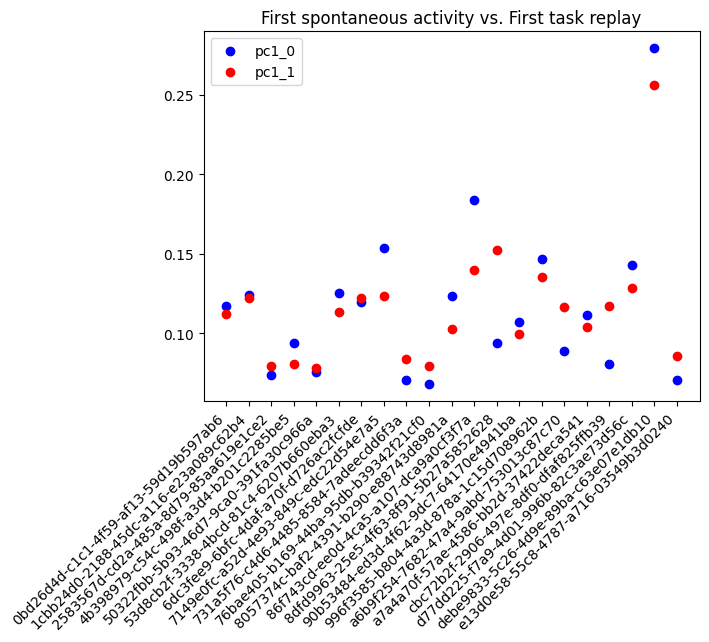

TtestResult(statistic=0.17939117262354798, pvalue=0.8594355297256909, df=20)


In [24]:
for column in df_pca.columns[2::]:
    pc1_0_values = df_pca[column].apply(lambda x: x['pc1_0'])
    pc1_1_values = df_pca[column].apply(lambda x: x['pc1_1'])

    # use np.arange to generate x values for the scatter plot
    plt.scatter(np.arange(len(pc1_0_values)), pc1_0_values, color='b', label='pc1_0')
    plt.scatter(np.arange(len(pc1_1_values)), pc1_1_values, color='r',  label='pc1_1')

    
    # Assuming df_pca['eid'] is of same length as pc1_*_values and in correct order
    # Otherwise you need to adjust df_pca['eid'] accordingly to match the order and size of pc1_*_values
    eid_labels = df_pca['eid']

    # set x-ticks and rotate them
    plt.xticks(np.arange(len(eid_labels)), eid_labels, rotation=45, ha='right')
    plt.title(column)
    plt.legend()
    plt.show()
    plt.close()

    print(scipy.stats.ttest_rel(pc1_0_values, pc1_1_values))
    break

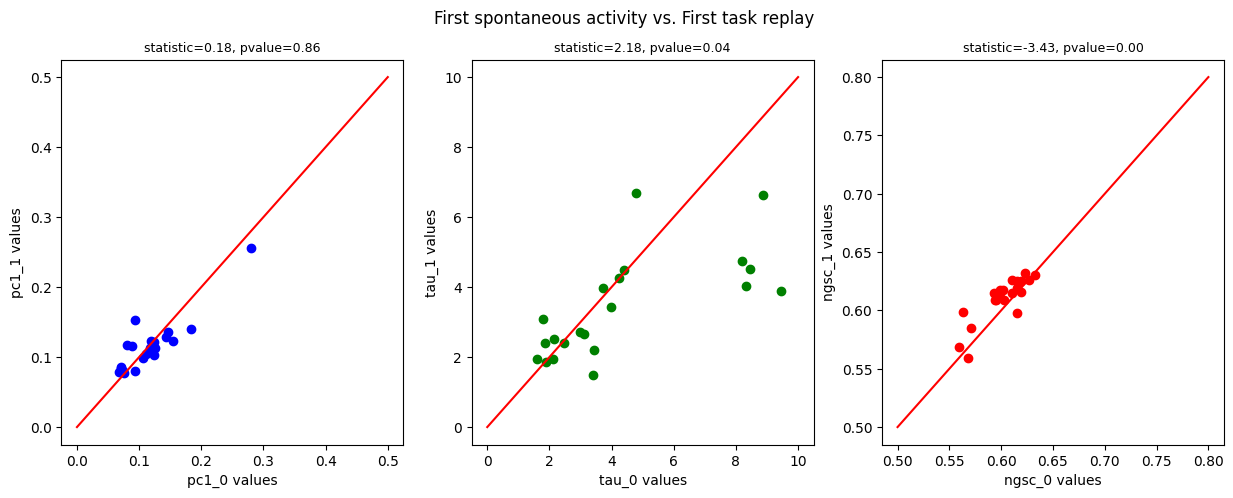

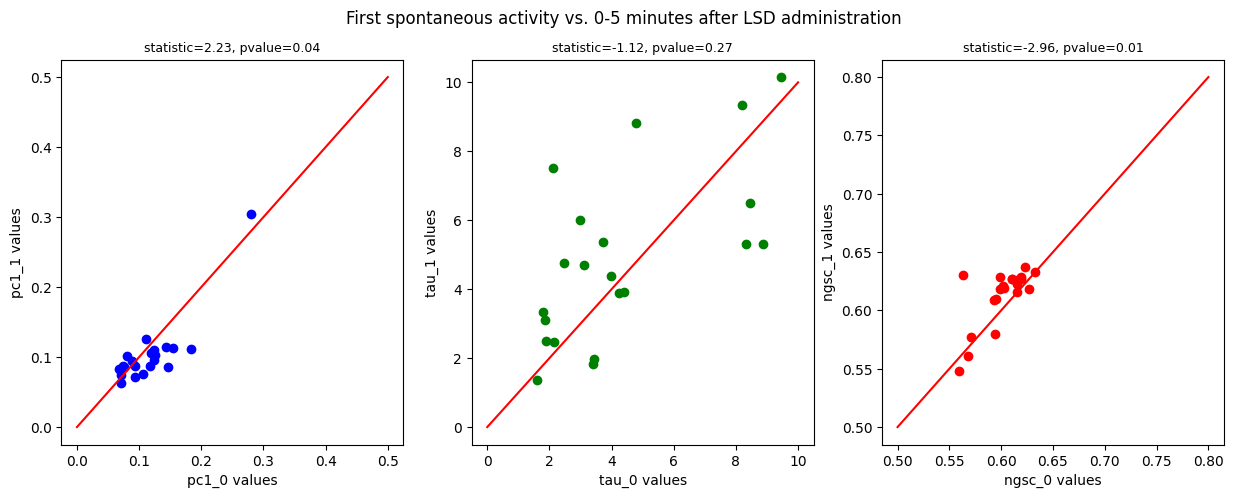

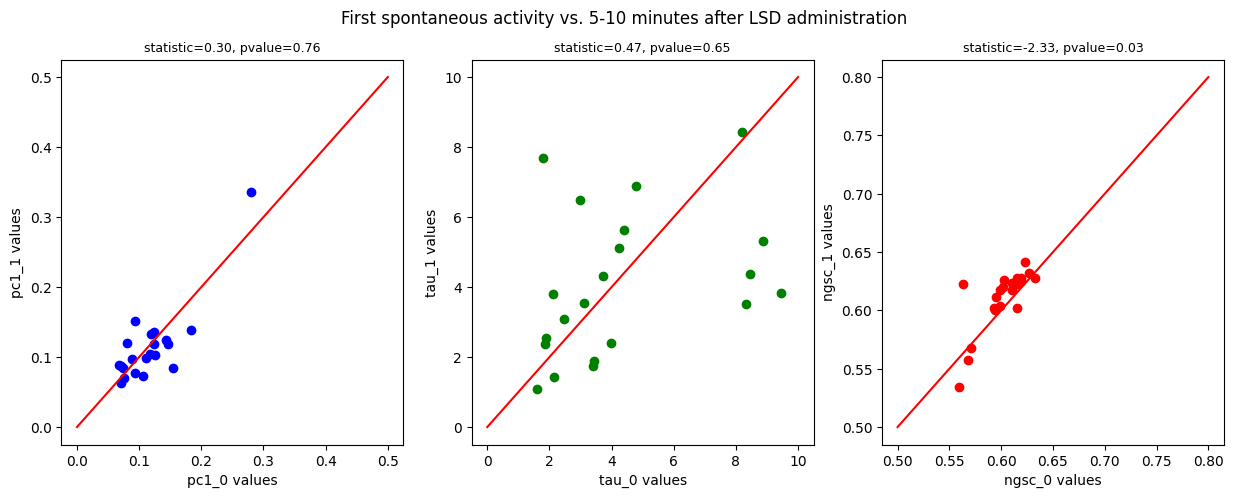

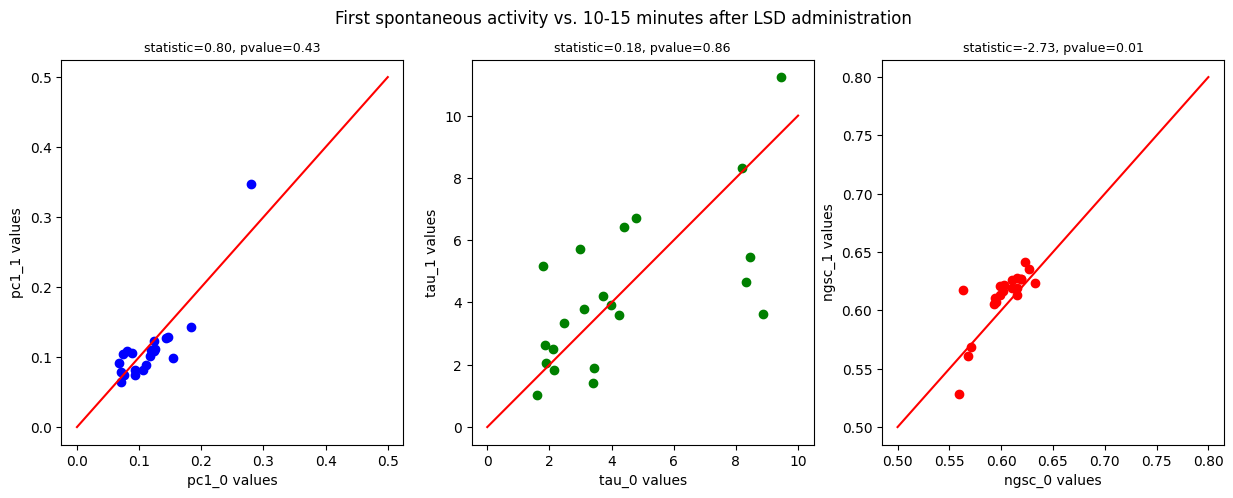

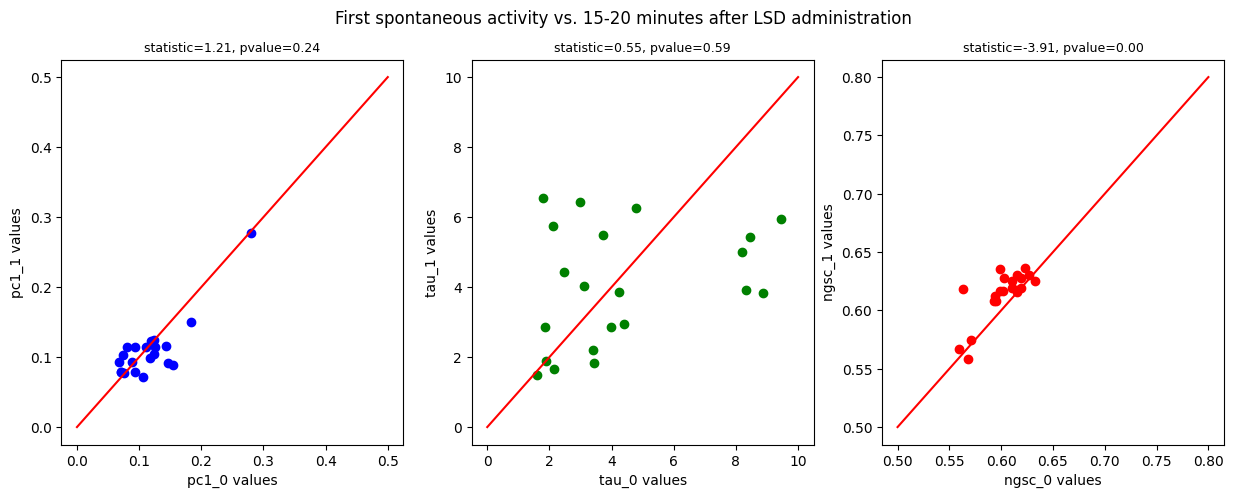

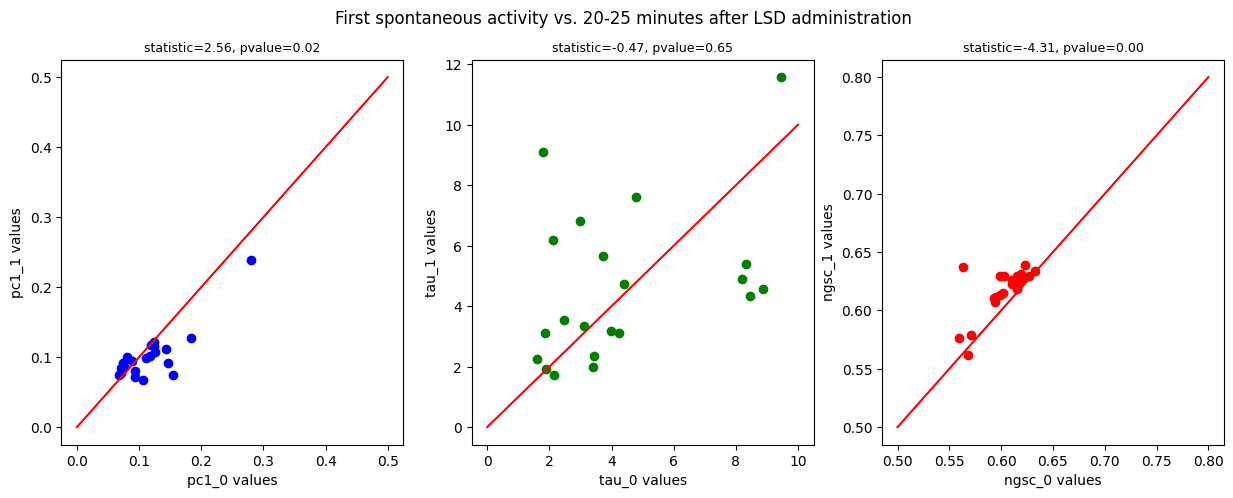

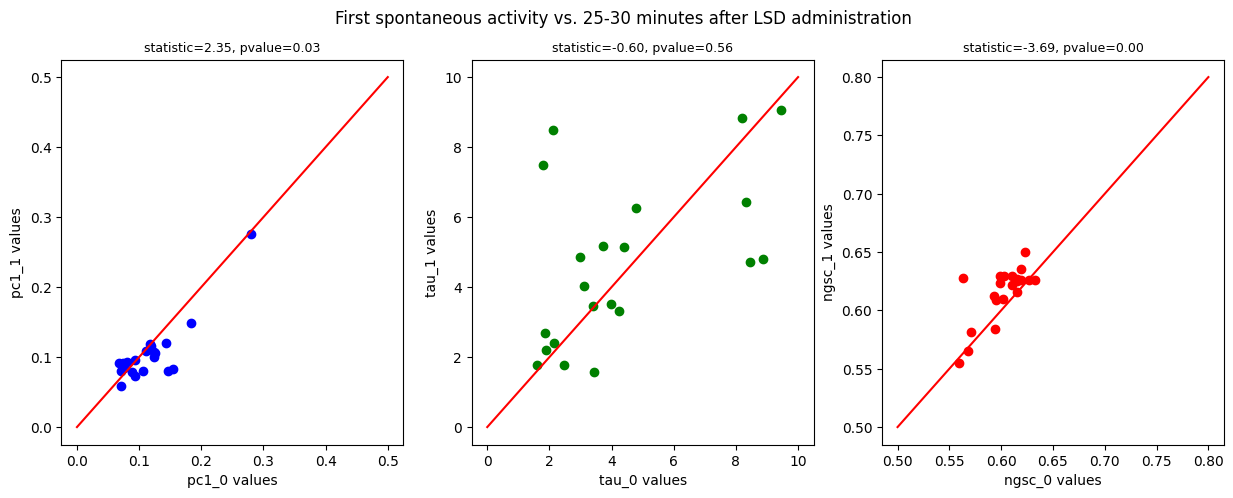

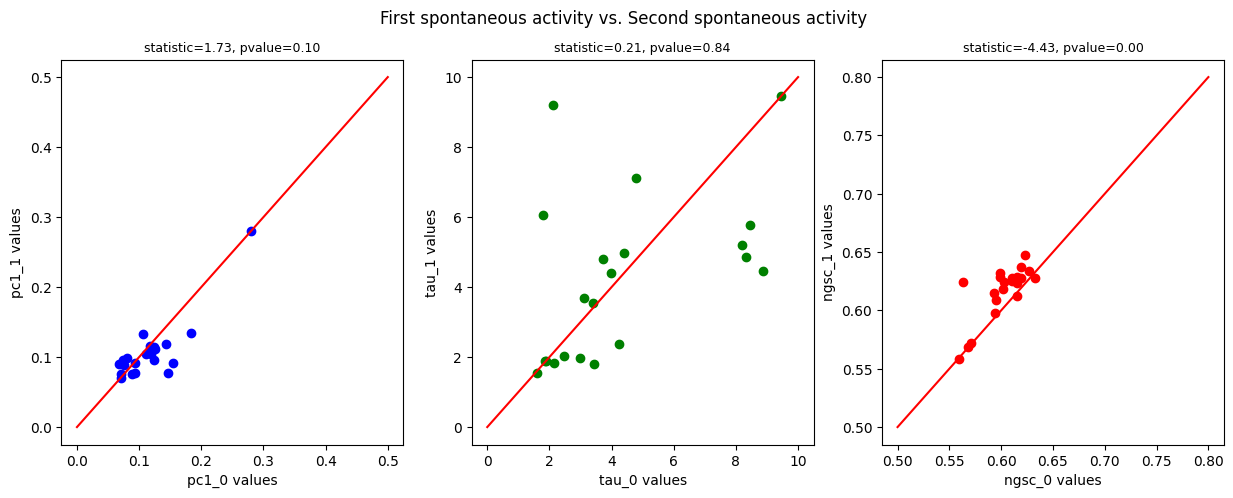

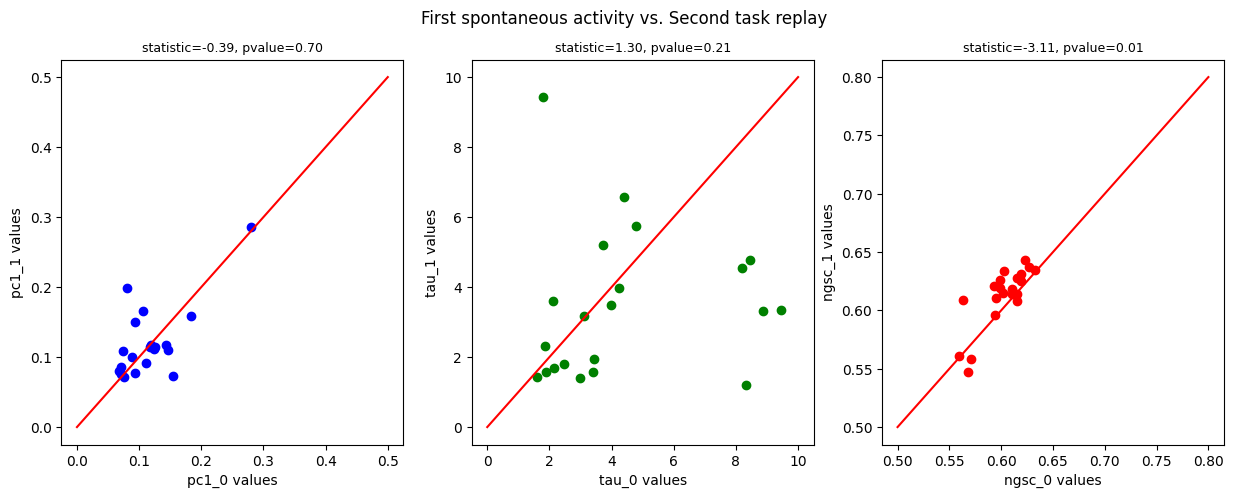

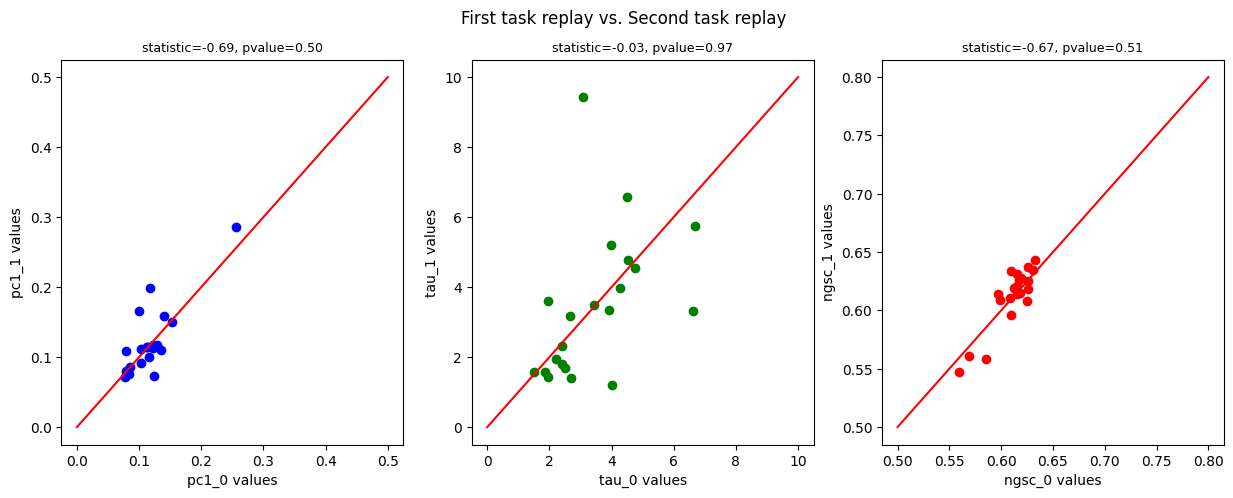

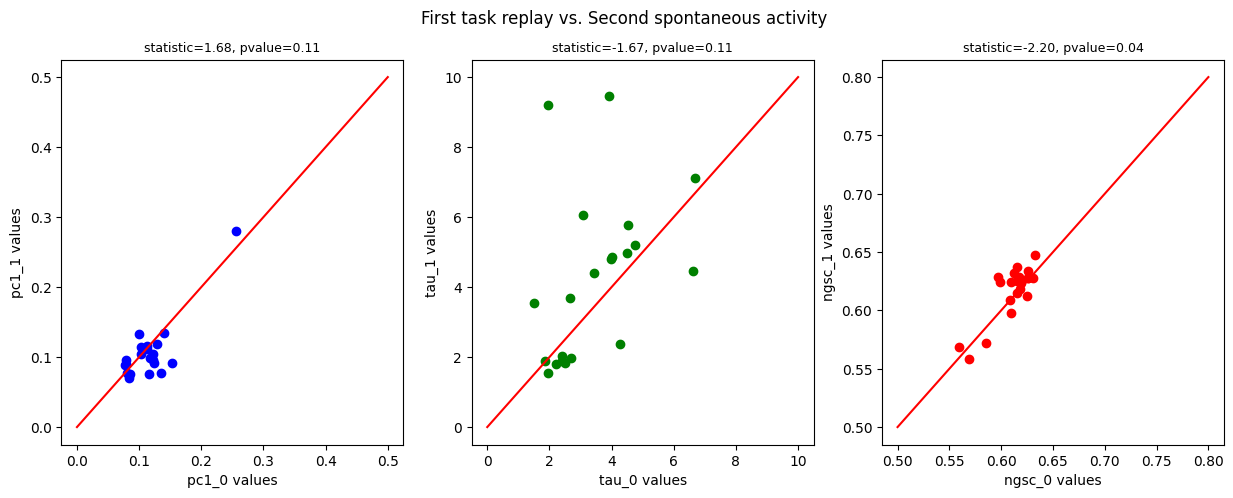

In [26]:
for column in df_pca.columns[2::]:
    fig, axs = plt.subplots(1, 3, figsize=(15,5))
    pairs = [('pc1_0', 'pc1_1'), ('tau_0', 'tau_1'), ('ngsc_0', 'ngsc_1')]
    colors = ['b', 'g', 'r']  # Set different colors for different plots
    pairs_title = ['PC1','Tau','NGSC']  # for labels on the 3 graphs
    line_dims = [[0,0.5], [0,10], [0.5, 0.8]]
    
    for i, pair in enumerate(pairs):
        pair_0_values = df_pca[column].apply(lambda x: x[pair[0]])
        pair_1_values = df_pca[column].apply(lambda x: x[pair[1]])
 
        axs[i].scatter(pair_0_values, pair_1_values, color=colors[i], label=column)
        axs[i].plot(line_dims[i], line_dims[i], color='r')
        ttest_result = scipy.stats.ttest_rel(pair_0_values, pair_1_values)

        # Format the t-test result with 2 decimal places.
        ttest_result_str = "statistic={:.2f}, pvalue={:.2f}".format(ttest_result.statistic, ttest_result.pvalue)
        
        axs[i].set_title(ttest_result_str, fontsize = 9)
        axs[i].set_xlabel(f"{pair[0]} values")
        axs[i].set_ylabel(f"{pair[1]} values")

    plt.suptitle(column)
    plt.show()
    plt.close()


column:  First spontaneous activity vs. First task replay
session:  0
session:  1
session:  2
session:  3
session:  4
session:  5
session:  6
session:  7
session:  8
session:  9
session:  10
session:  11
session:  12
session:  13
session:  14
session:  15
session:  16
session:  17
session:  18
session:  19
session:  20
column:  First spontaneous activity vs. 0-5 minutes after LSD administration
session:  0
session:  1
session:  2
session:  3
session:  4
session:  5
session:  6
session:  7
session:  8
session:  9
session:  10
session:  11
session:  12
session:  13
session:  14
session:  15
session:  16
session:  17
session:  18
session:  19
session:  20
column:  First spontaneous activity vs. 5-10 minutes after LSD administration
session:  0
session:  1
session:  2
session:  3
session:  4
session:  5
session:  6
session:  7
session:  8
session:  9
session:  10
session:  11
session:  12
session:  13
session:  14
session:  15
session:  16
session:  17
session:  18
session:  19
session:  2

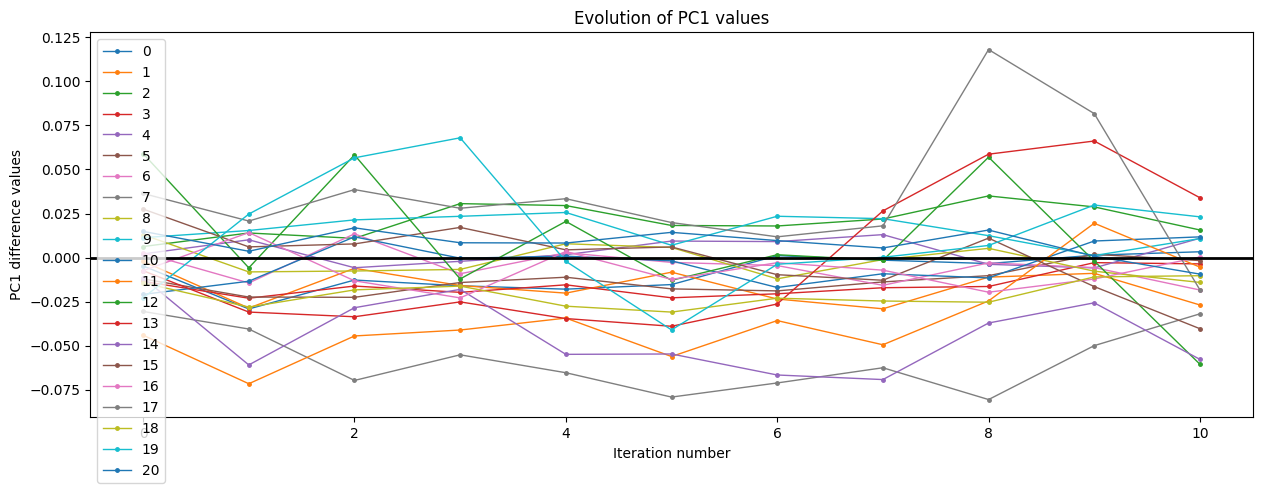

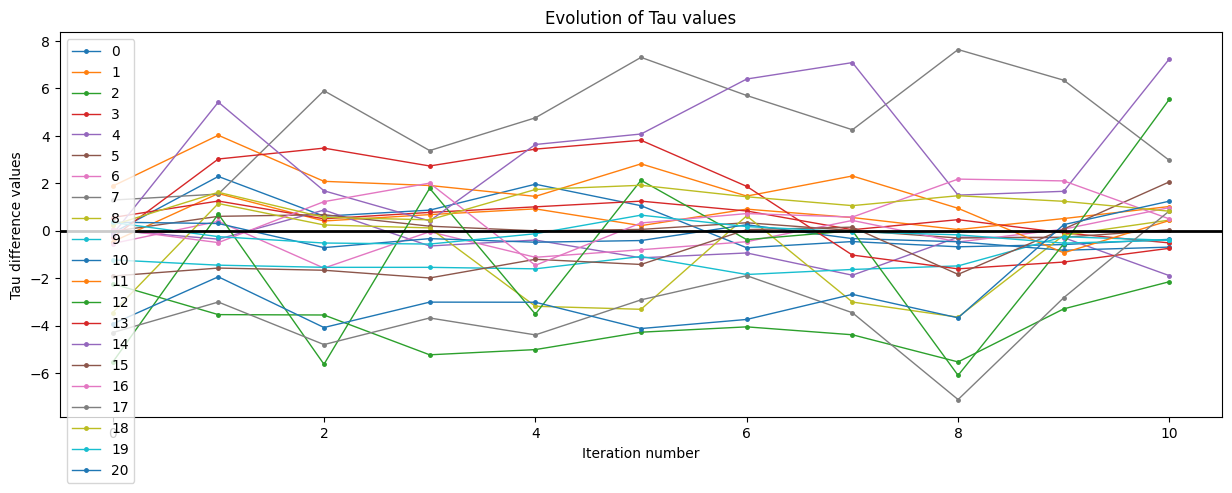

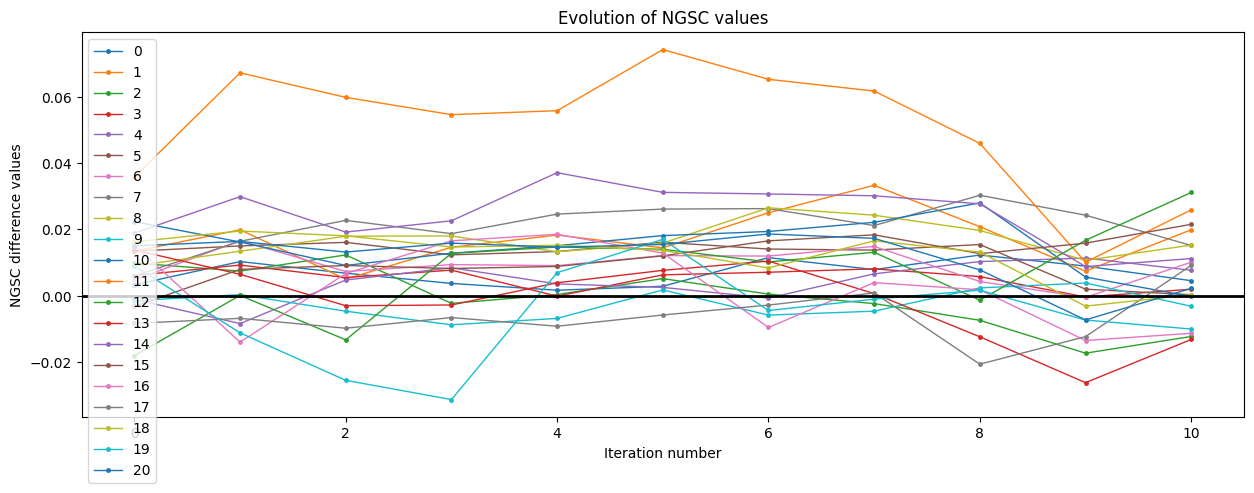

In [27]:
sessions = [key for key in df_pca[list(df_pca.keys())[1]].keys()]  # get all session names

# Container for results
evolutions = {'PC1': {}, 'Tau': {}, 'NGSC': {}}

for column in df_pca.columns[2::]:
    print ('column: ', column)
    for session in sessions:
        print ('session: ', session)
        for i, pair in enumerate([('pc1_0', 'pc1_1'), ('tau_0', 'tau_1'), ('ngsc_0', 'ngsc_1')]):
            pair_0_value = df_pca.at[session,column][pair[0]]
            pair_1_value = df_pca.at[session,column][pair[1]]
            difference = pair_1_value - pair_0_value
            measure = ['PC1', 'Tau', 'NGSC'][i]
            if session not in evolutions[measure]:
                evolutions[measure][session] = []
            evolutions[measure][session].append(difference)

# Now we plot
for measure in evolutions.keys():
    fig, ax = plt.subplots(figsize=(15,5)) 
    for session in evolutions[measure].keys():
        ax.plot(evolutions[measure][session], marker='.', label=session, linewidth = 1, markersize = 5)
    ax.axhline (0, color = 'black', linewidth = 2)
    ax.legend(loc='upper left')
    ax.set_xlabel('Iteration number')
    ax.set_ylabel(f'{measure} difference values')
    ax.set_title(f'Evolution of {measure} values')
    plt.show()

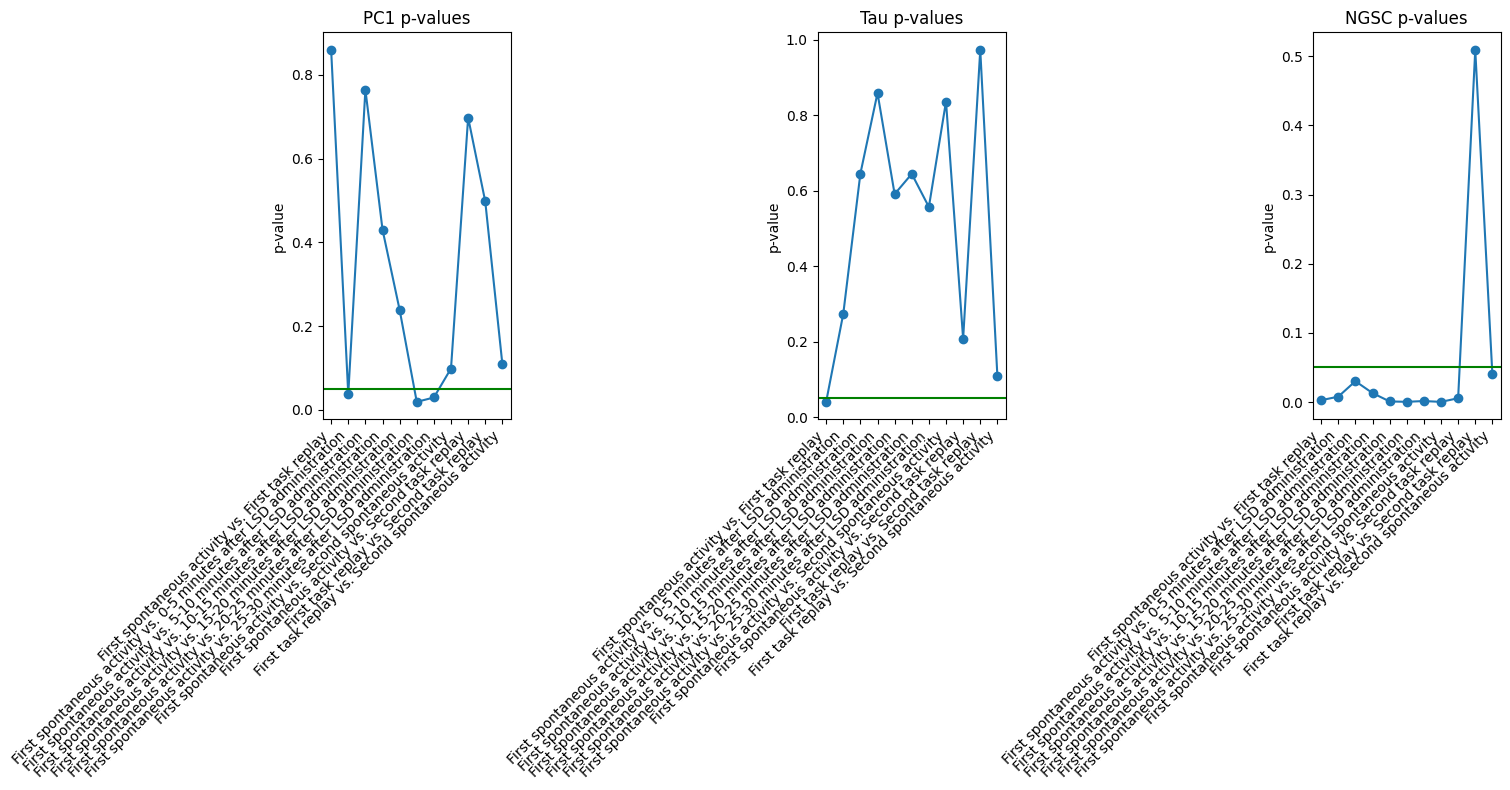

In [28]:
# Create empty lists to store p-values
p_values_pc1 = []
p_values_tau = []
p_values_ngsc = []

# Store column/comparison names
comparison_names = []

for column in df_pca.columns[2::]:
    pairs = [('pc1_0', 'pc1_1'), ('tau_0', 'tau_1'), ('ngsc_0', 'ngsc_1')]
    line_dims = [[0,0.5], [0,10], [0.5, 0.8]]

    # Store column name
    comparison_names.append(column)

    for i, pair in enumerate(pairs):
        pair_0_values = df_pca[column].apply(lambda x: x[pair[0]])
        pair_1_values = df_pca[column].apply(lambda x: x[pair[1]])
        ttest_result = scipy.stats.ttest_rel(pair_0_values, pair_1_values)

        # Store p-values
        if i == 0:
            p_values_pc1.append(ttest_result.pvalue)
        elif i == 1:
            p_values_tau.append(ttest_result.pvalue)
        elif i == 2:
            p_values_ngsc.append(ttest_result.pvalue)

# Generate x values
x_values = np.arange(len(comparison_names))

# Create new figure for p-value evolution and make it bigger
fig, axs = plt.subplots(1, 3, figsize=(15,8))  # Change figsize to make the figure bigger

# Plot 1: PC1 p-values
axs[0].plot(x_values, p_values_pc1, 'o-')
axs[0].axhline(y=0.05, color='g', linestyle='-')  # Horizontal line at y=0.05
axs[0].set_xticks(x_values)
axs[0].set_xticklabels(comparison_names, rotation=45, ha='right')
axs[0].set_title('PC1 p-values')
axs[0].set_ylabel('p-value')

# Plot 2: Tau p-values
axs[1].plot(x_values, p_values_tau, 'o-')
axs[1].axhline(y=0.05, color='g', linestyle='-')  # Horizontal line at y=0.05
axs[1].set_xticks(x_values)
axs[1].set_xticklabels(comparison_names, rotation=45, ha='right')
axs[1].set_title('Tau p-values')
axs[1].set_ylabel('p-value')

# Plot 3: NGSC p-values
axs[2].plot(x_values, p_values_ngsc, 'o-')
axs[2].axhline(y=0.05, color='g', linestyle='-')  # Horizontal line at y=0.05
axs[2].set_xticks(x_values)
axs[2].set_xticklabels(comparison_names, rotation=45, ha='right')
axs[2].set_title('NGSC p-values')
axs[2].set_ylabel('p-value')

plt.tight_layout()
plt.show()

In [34]:
from scipy.stats import entropy
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

def exponential(x, tau):
    return np.exp(-x/tau)

variances = []

# List of tuples (time after start, time after end) for each time window
time_windows = [(300, 900), (600, 1200)]  # Add more tuples as necessary
five_min = 300

for idx, session in df_spikes.groupby(['eid']):
    print(idx)
    if len(session) < 20:
        continue
    spontaneous_00_start = df_timings.loc[idx, f'spontaneous_start_00']
    spontaneous_00_stop  = df_timings.loc[idx, f'spontaneous_stop_00']
    task_replay_01_start  = df_timings.loc[idx, f'replay_start_01']
    admin_time  = df_timings.loc[idx, f'admin_time']
    comparisons = {}
    counter = 1
    jump_in_seconds = 60
    while (spontaneous_00_stop +(counter*jump_in_seconds)) <= task_replay_01_start:
        print (f'{(spontaneous_00_stop +(counter*jump_in_seconds))} <= {task_replay_01_start}')
        this_jump = (counter*jump_in_seconds)
        window_size = spontaneous_00_stop - spontaneous_00_start
        comparisons[f'First spontaneous activity vs. +{this_jump}s window'] = [[spontaneous_00_start, spontaneous_00_stop], [admin_time + this_jump, admin_time + window_size + this_jump]]
        counter += 1
    print (comparisons)
    dict_var = {'eid': idx, 'timings': comparisons}

    for comparison in comparisons:
        counter = 0
        dict_var[f'{comparison}'] = {}
        for time_window in comparisons[comparison]:
            start_time = time_window[0]
            end_time = time_window[1]
            args = {'start': start_time, 'stop': end_time, 'dt': 0.1}

            # Get binned counts for the desired interval for each unit
            sp00_spike_counts = session.apply(_get_binned_spike_counts, **args, axis='columns')
            X = np.column_stack(sp00_spike_counts)  # convert it to 2D array w/ units as columns
            # print (X.shape)
            # Min-max normalize
            scaler = MinMaxScaler()
            X_norm = scaler.fit_transform(X)

            # PCA
            pca = PCA()
            pca.fit(X_norm)

            # Skree plot
            # fig, ax = plt.subplots()
            # ax.plot(pca.explained_variance_ratio_)
            [tau], _ = scipy.optimize.curve_fit(exponential, np.arange(pca.n_components_), pca.explained_variance_ratio_/pca.explained_variance_ratio_[0])

            # Save the results
            window_str = f'{time_window[0]}_{time_window[1]}'
            dict_var[f'{comparison}'][f'pc1_{counter}'] = pca.explained_variance_ratio_[0]
            dict_var[f'{comparison}'][f'pcs_{counter}'] = pca.explained_variance_ratio_
            dict_var[f'{comparison}'][f'tau_{counter}'] = tau
            dict_var[f'{comparison}'][f'ngsc_{counter}'] = entropy(pca.explained_variance_ratio_) / np.log2(pca.n_components_)
            counter += 1
    variances.append(dict_var)

/tmp/ipykernel_1588510/299712603.py:17: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for idx, session in df_spikes.groupby(['eid']):


0bd26d4d-c1c1-4f59-af13-59d19b597ab6
460.0 <= 3578.0
520.0 <= 3578.0
580.0 <= 3578.0
640.0 <= 3578.0
700.0 <= 3578.0
760.0 <= 3578.0
820.0 <= 3578.0
880.0 <= 3578.0
940.0 <= 3578.0
1000.0 <= 3578.0
1060.0 <= 3578.0
1120.0 <= 3578.0
1180.0 <= 3578.0
1240.0 <= 3578.0
1300.0 <= 3578.0
1360.0 <= 3578.0
1420.0 <= 3578.0
1480.0 <= 3578.0
1540.0 <= 3578.0
1600.0 <= 3578.0
1660.0 <= 3578.0
1720.0 <= 3578.0
1780.0 <= 3578.0
1840.0 <= 3578.0
1900.0 <= 3578.0
1960.0 <= 3578.0
2020.0 <= 3578.0
2080.0 <= 3578.0
2140.0 <= 3578.0
2200.0 <= 3578.0
2260.0 <= 3578.0
2320.0 <= 3578.0
2380.0 <= 3578.0
2440.0 <= 3578.0
2500.0 <= 3578.0
2560.0 <= 3578.0
2620.0 <= 3578.0
2680.0 <= 3578.0
2740.0 <= 3578.0
2800.0 <= 3578.0
2860.0 <= 3578.0
2920.0 <= 3578.0
2980.0 <= 3578.0
3040.0 <= 3578.0
3100.0 <= 3578.0
3160.0 <= 3578.0
3220.0 <= 3578.0
3280.0 <= 3578.0
3340.0 <= 3578.0
3400.0 <= 3578.0
3460.0 <= 3578.0
3520.0 <= 3578.0
{'First spontaneous activity vs. +60s window': [[0.0, 400.0], [1136.0, 1536.0]], 'First 

/home/openlab/anaconda3/envs/iblenv/lib/python3.10/site-packages/sklearn/decomposition/_pca.py:653: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var


ValueError: array must not contain infs or NaNs

In [30]:
df_pca = pd.DataFrame (variances)
df_pca = df_pca.dropna(axis=1)
df_pca

Empty DataFrame
Columns: []
Index: []

In [31]:
for column in df_pca.columns[2::]:
    pc1_0_values = df_pca[column].apply(lambda x: x['pc1_0'])
    pc1_1_values = df_pca[column].apply(lambda x: x['pc1_1'])

    # use np.arange to generate x values for the scatter plot
    plt.scatter(np.arange(len(pc1_0_values)), pc1_0_values, color='b', label='pc1_0')
    plt.scatter(np.arange(len(pc1_1_values)), pc1_1_values, color='r',  label='pc1_1')

    
    # Assuming df_pca['eid'] is of same length as pc1_*_values and in correct order
    # Otherwise you need to adjust df_pca['eid'] accordingly to match the order and size of pc1_*_values
    eid_labels = df_pca['eid']

    # set x-ticks and rotate them
    plt.xticks(np.arange(len(eid_labels)), eid_labels, rotation=45, ha='right')
    plt.title(column)
    plt.legend()
    plt.show()
    plt.close()

    print(scipy.stats.ttest_rel(pc1_0_values, pc1_1_values))
    break
    

In [32]:
for column in df_pca.columns[2::]:
    fig, axs = plt.subplots(1, 3, figsize=(15,5))
    pairs = [('pc1_0', 'pc1_1'), ('tau_0', 'tau_1'), ('ngsc_0', 'ngsc_1')]
    colors = ['b', 'g', 'r']  # Set different colors for different plots
    pairs_title = ['PC1','Tau','NGSC']  # for labels on the 3 graphs
    line_dims = [[0,0.5], [0,10], [0.5, 0.8]]
    
    for i, pair in enumerate(pairs):
        pair_0_values = df_pca[column].apply(lambda x: x[pair[0]])
        pair_1_values = df_pca[column].apply(lambda x: x[pair[1]])
 
        axs[i].scatter(pair_0_values, pair_1_values, color=colors[i], label=column)
        axs[i].plot(line_dims[i], line_dims[i], color='r')
        
        ttest_result = scipy.stats.ttest_rel(pair_0_values, pair_1_values)
        # Format the t-test result with 2 decimal places.
        ttest_result_str = "statistic={:.2f}, pvalue={:.2f}".format(ttest_result.statistic, ttest_result.pvalue)
        
        axs[i].set_title(ttest_result_str, fontsize = 9)
        axs[i].set_xlabel(f"{pair[0]} values")
        axs[i].set_ylabel(f"{pair[1]} values")

    plt.suptitle(column)
    plt.show()
    plt.close()
    # break


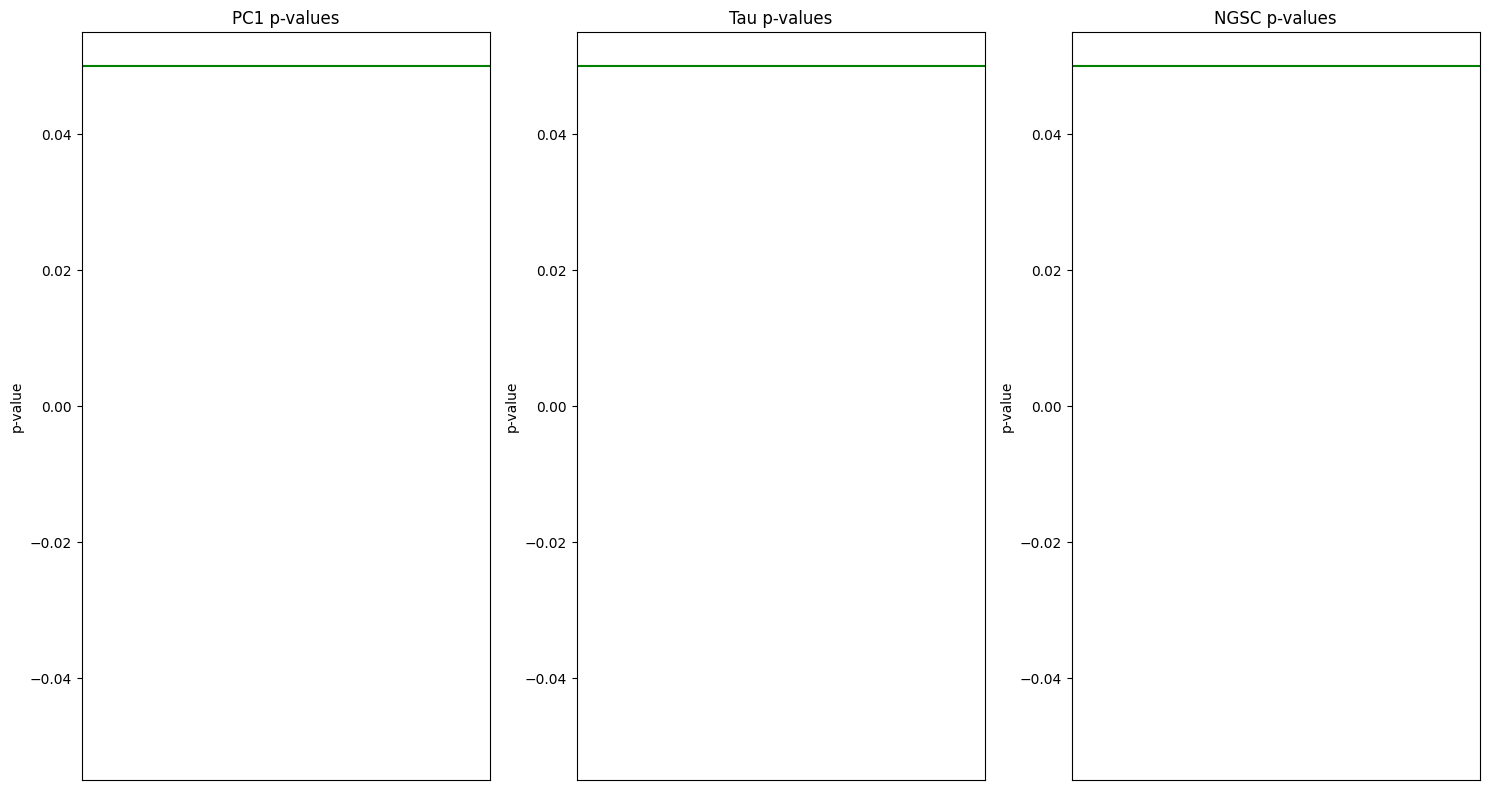

In [33]:
# Create empty lists to store p-values
p_values_pc1 = []
p_values_tau = []
p_values_ngsc = []

# Store column/comparison names
comparison_names = []

for column in df_pca.columns[2::]:
    pairs = [('pc1_0', 'pc1_1'), ('tau_0', 'tau_1'), ('ngsc_0', 'ngsc_1')]
    line_dims = [[0,0.5], [0,10], [0.5, 0.8]]

    # Store column name
    comparison_names.append(column)

    for i, pair in enumerate(pairs):
        pair_0_values = df_pca[column].apply(lambda x: x[pair[0]])
        pair_1_values = df_pca[column].apply(lambda x: x[pair[1]])
        ttest_result = scipy.stats.ttest_rel(pair_0_values, pair_1_values)

        # Store p-values
        if i == 0:
            p_values_pc1.append(ttest_result.pvalue)
        elif i == 1:
            p_values_tau.append(ttest_result.pvalue)
        elif i == 2:
            p_values_ngsc.append(ttest_result.pvalue)

# Generate x values
x_values = np.arange(len(comparison_names))

# Create new figure for p-value evolution and make it bigger
fig, axs = plt.subplots(1, 3, figsize=(15,8))  # Change figsize to make the figure bigger

# Plot 1: PC1 p-values
axs[0].plot(x_values, p_values_pc1, 'o-')
axs[0].axhline(y=0.05, color='g', linestyle='-')  # Horizontal line at y=0.05
axs[0].set_xticks(x_values)
axs[0].set_xticklabels(comparison_names, rotation=45, ha='right')
axs[0].set_title('PC1 p-values')
axs[0].set_ylabel('p-value')

# Plot 2: Tau p-values
axs[1].plot(x_values, p_values_tau, 'o-')
axs[1].axhline(y=0.05, color='g', linestyle='-')  # Horizontal line at y=0.05
axs[1].set_xticks(x_values)
axs[1].set_xticklabels(comparison_names, rotation=45, ha='right')
axs[1].set_title('Tau p-values')
axs[1].set_ylabel('p-value')

# Plot 3: NGSC p-values
axs[2].plot(x_values, p_values_ngsc, 'o-')
axs[2].axhline(y=0.05, color='g', linestyle='-')  # Horizontal line at y=0.05
axs[2].set_xticks(x_values)
axs[2].set_xticklabels(comparison_names, rotation=45, ha='right')
axs[2].set_title('NGSC p-values')
axs[2].set_ylabel('p-value')

plt.tight_layout()
plt.show()

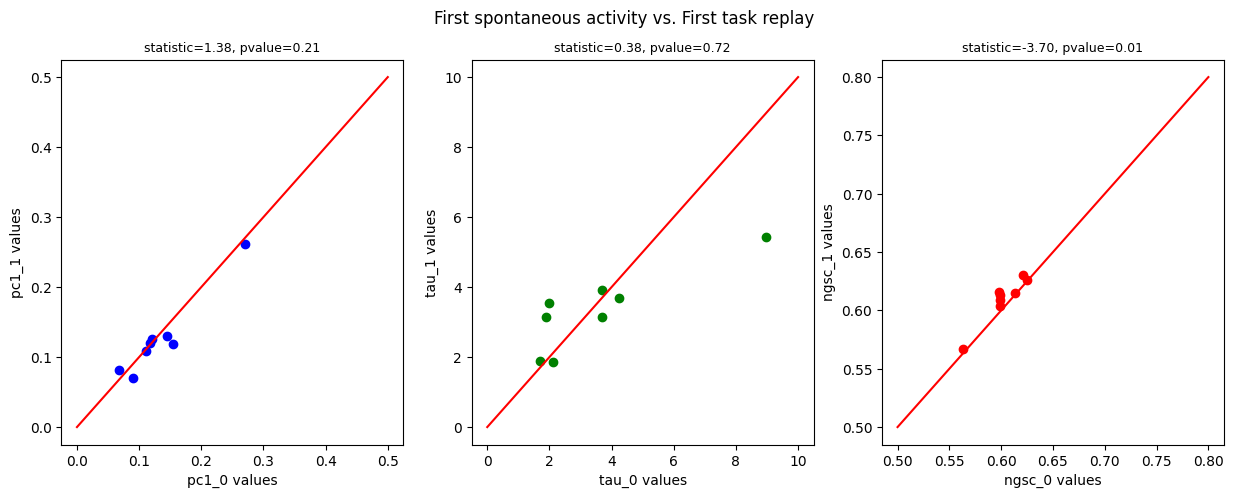

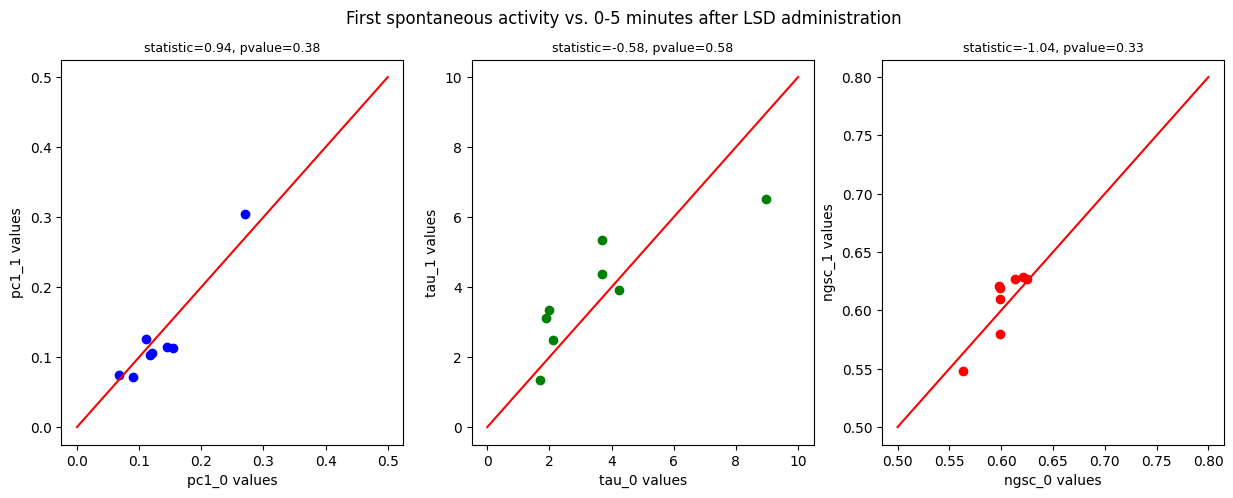

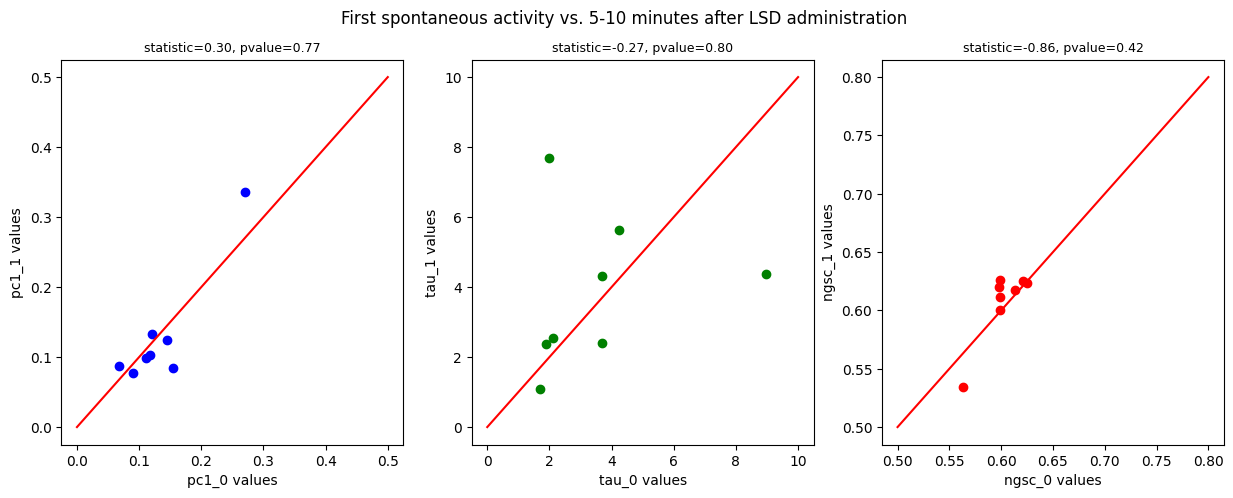

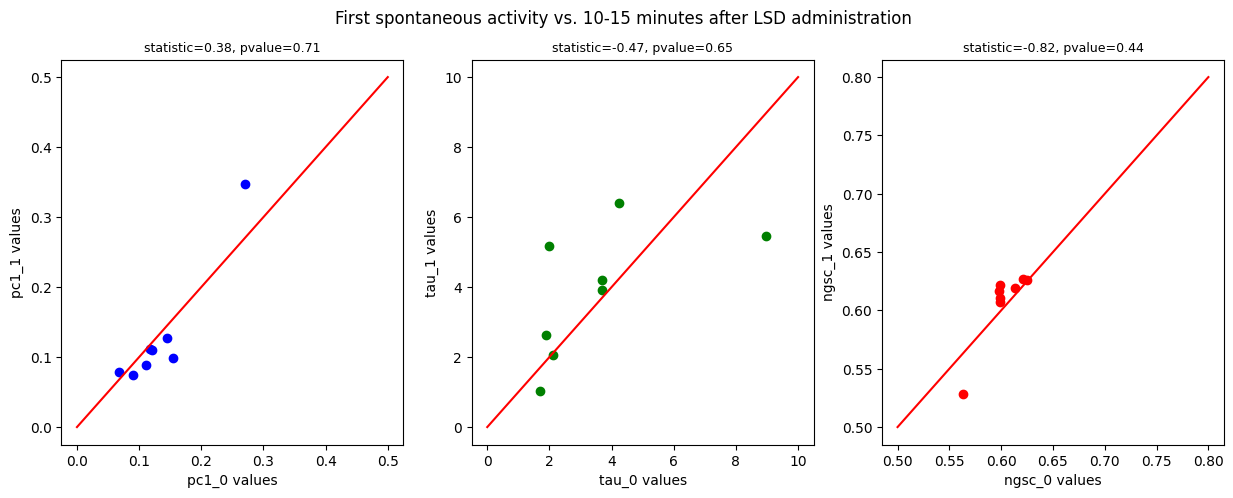

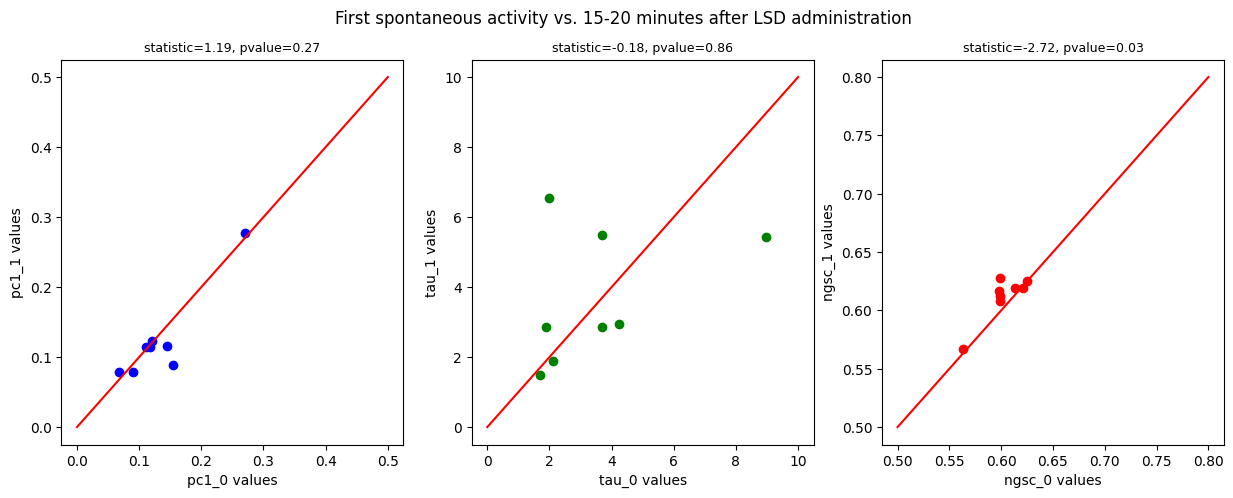

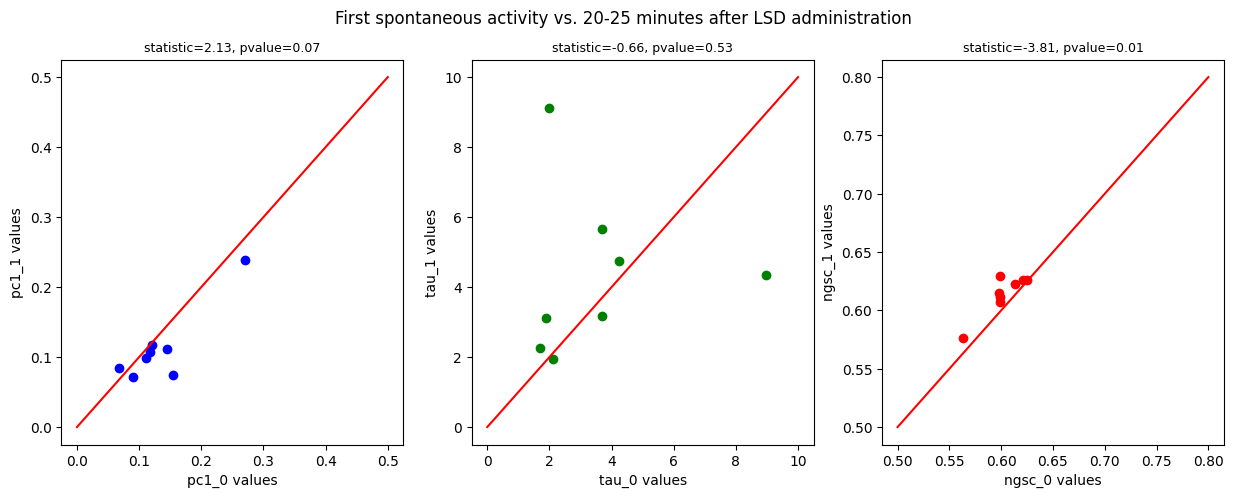

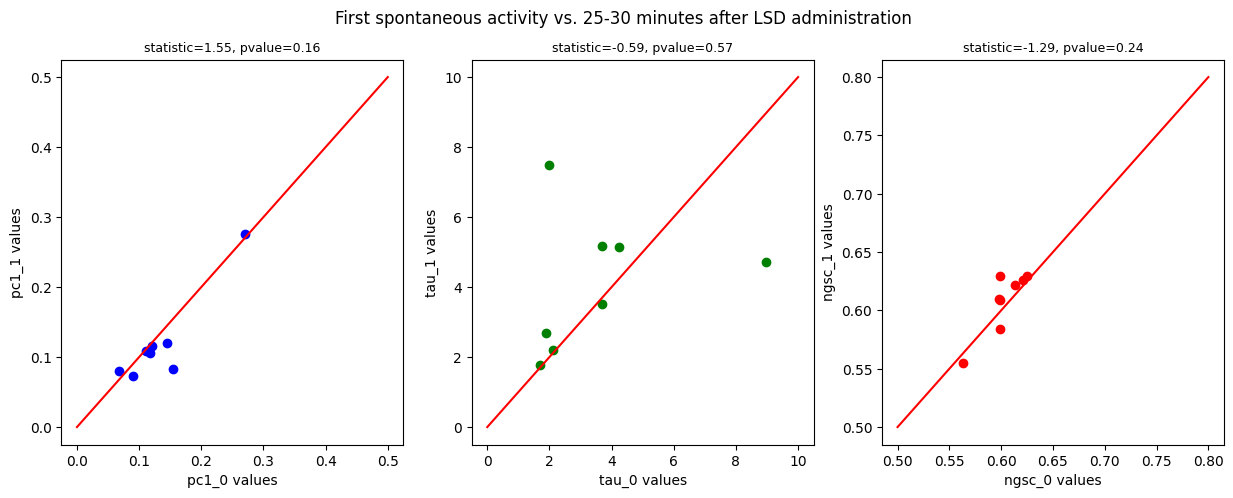

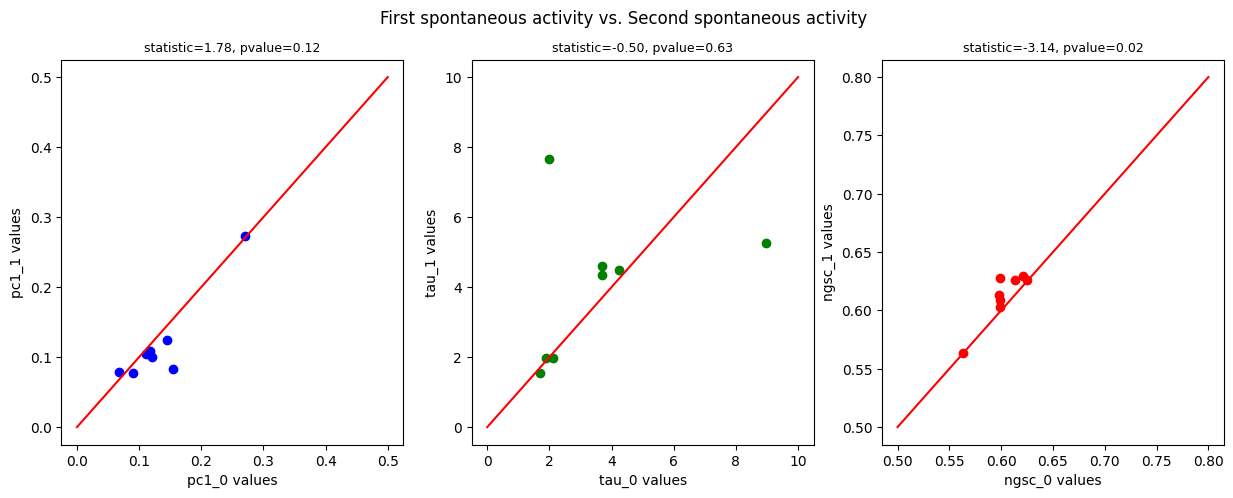

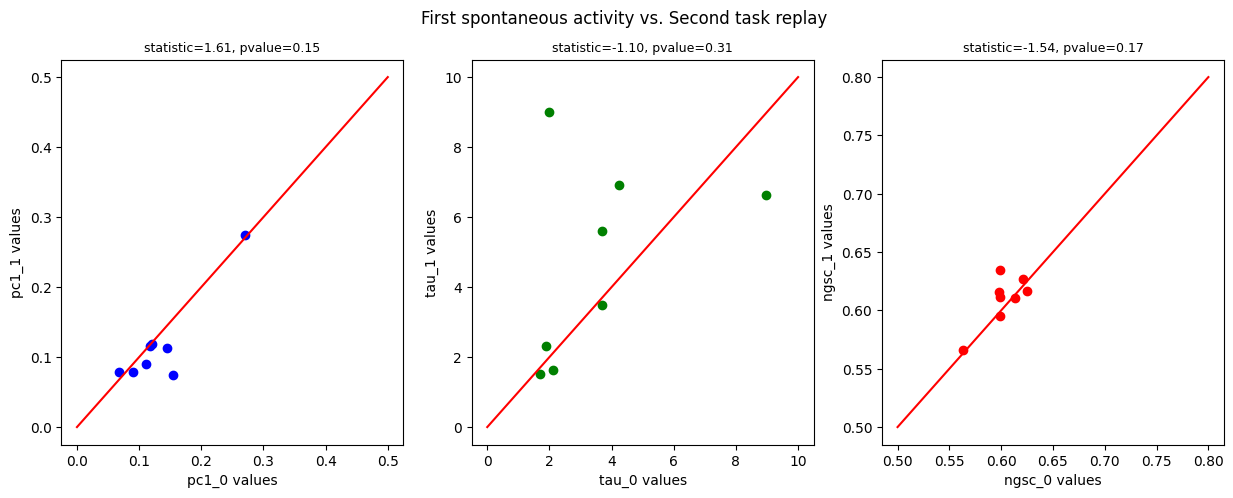

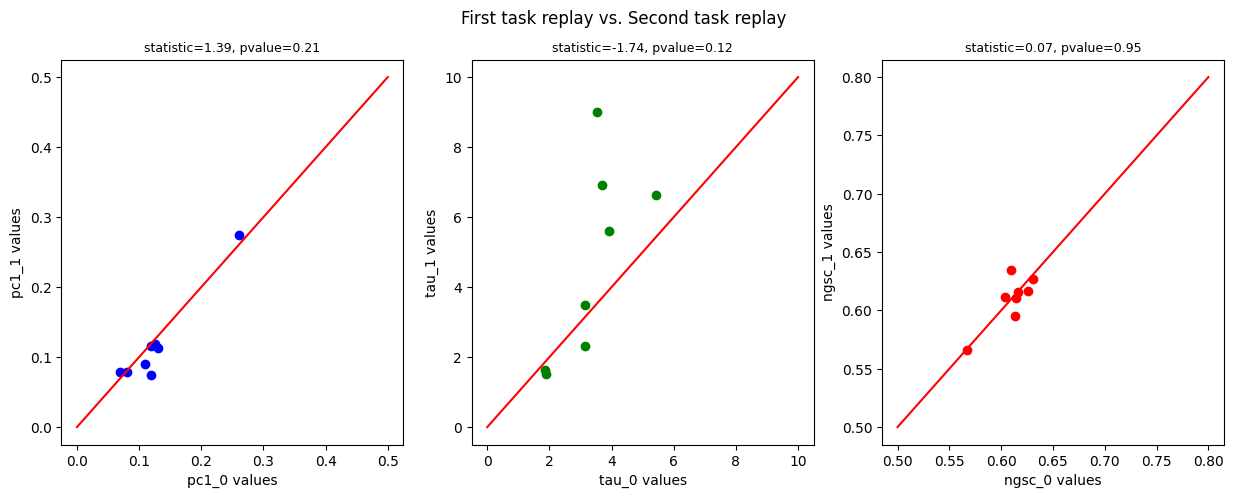

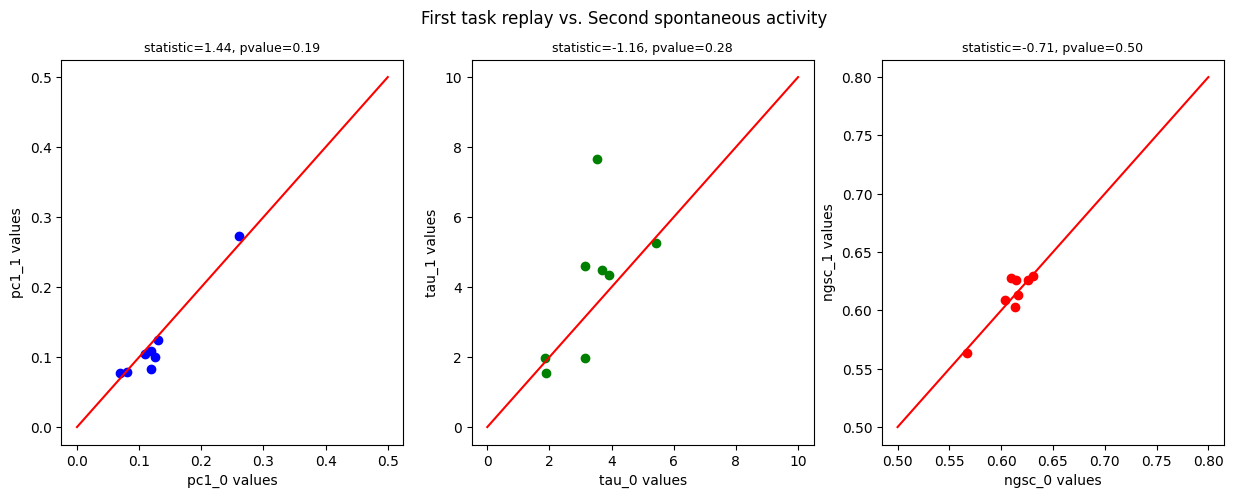

In [233]:
for column in df_pca.columns[2::]:
    fig, axs = plt.subplots(1, 3, figsize=(15,5))
    pairs = [('pc1_0', 'pc1_1'), ('tau_0', 'tau_1'), ('ngsc_0', 'ngsc_1')]
    colors = ['b', 'g', 'r']  # Set different colors for different plots
    pairs_title = ['PC1','Tau','NGSC']  # for labels on the 3 graphs
    line_dims = [[0,0.5], [0,10], [0.5, 0.8]]
    
    for i, pair in enumerate(pairs):
        pair_0_values = df_pca[column].apply(lambda x: x[pair[0]])
        pair_1_values = df_pca[column].apply(lambda x: x[pair[1]])
 
        axs[i].scatter(pair_0_values, pair_1_values, color=colors[i], label=column)
        axs[i].plot(line_dims[i], line_dims[i], color='r')
        
        ttest_result = scipy.stats.ttest_rel(pair_0_values, pair_1_values)
        # Format the t-test result with 2 decimal places.
        ttest_result_str = "statistic={:.2f}, pvalue={:.2f}".format(ttest_result.statistic, ttest_result.pvalue)
        
        axs[i].set_title(ttest_result_str, fontsize = 9)
        axs[i].set_xlabel(f"{pair[0]} values")
        axs[i].set_ylabel(f"{pair[1]} values")

    plt.suptitle(column)
    plt.show()
    plt.close()


column:  First spontaneous activity vs. +60s window
session:  0
session:  1
session:  2
session:  3
session:  4
session:  5
session:  6
session:  7
column:  First spontaneous activity vs. +240s window
session:  0
session:  1
session:  2
session:  3
session:  4
session:  5
session:  6
session:  7
column:  First spontaneous activity vs. +540s window
session:  0
session:  1
session:  2
session:  3
session:  4
session:  5
session:  6
session:  7
column:  First spontaneous activity vs. +960s window
session:  0
session:  1
session:  2
session:  3
session:  4
session:  5
session:  6
session:  7
column:  First spontaneous activity vs. +1500s window
session:  0
session:  1
session:  2
session:  3
session:  4
session:  5
session:  6
session:  7
column:  First spontaneous activity vs. +2160s window
session:  0
session:  1
session:  2
session:  3
session:  4
session:  5
session:  6
session:  7
column:  First spontaneous activity vs. +2940s window
session:  0
session:  1
session:  2
session:  3
ses

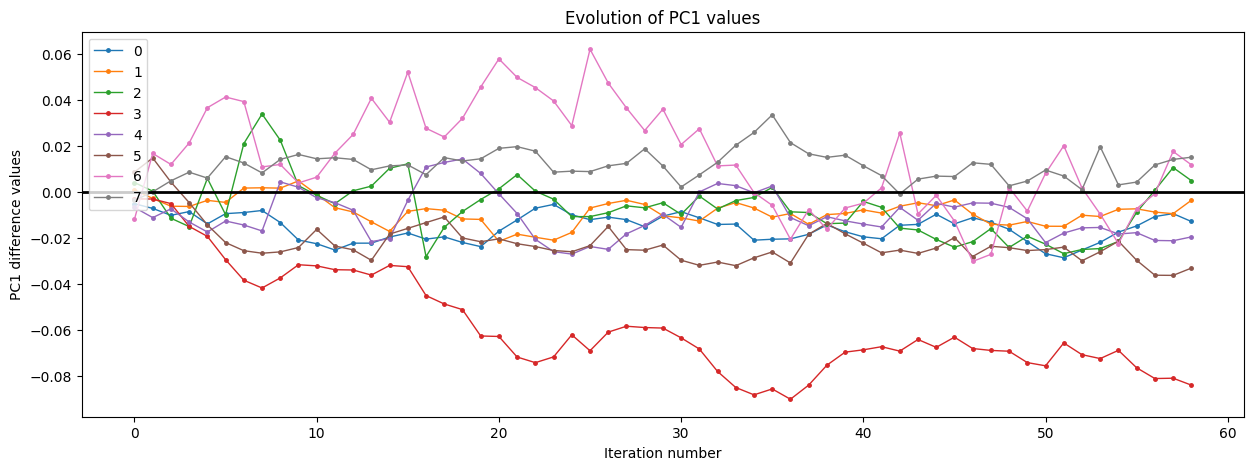

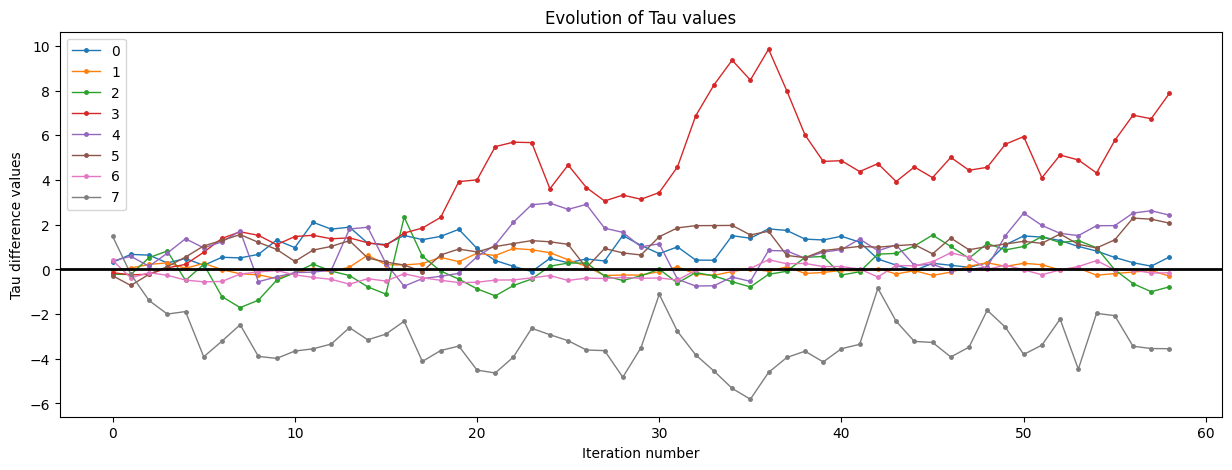

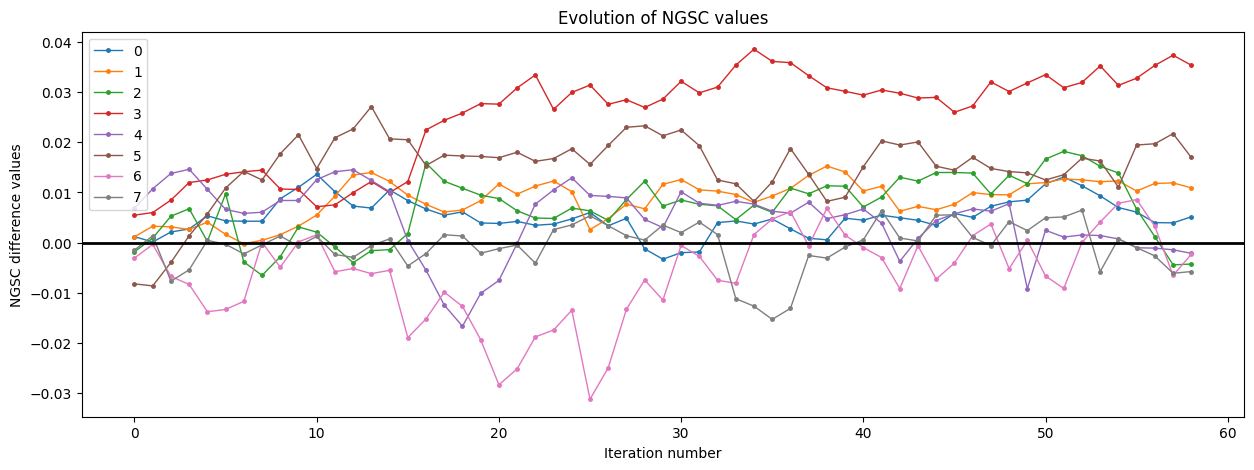

In [216]:
sessions = [key for key in df_pca[list(df_pca.keys())[1]].keys()]  # get all session names

# Container for results
evolutions = {'PC1': {}, 'Tau': {}, 'NGSC': {}}

for column in df_pca.columns[2::]:
    print ('column: ', column)
    for session in sessions:
        print ('session: ', session)
        for i, pair in enumerate([('pc1_0', 'pc1_1'), ('tau_0', 'tau_1'), ('ngsc_0', 'ngsc_1')]):
            pair_0_value = df_pca.at[session,column][pair[0]]
            pair_1_value = df_pca.at[session,column][pair[1]]
            difference = pair_1_value - pair_0_value
            measure = ['PC1', 'Tau', 'NGSC'][i]
            if session not in evolutions[measure]:
                evolutions[measure][session] = []
            evolutions[measure][session].append(difference)

# Now we plot
for measure in evolutions.keys():
    fig, ax = plt.subplots(figsize=(15,5)) 
    for session in evolutions[measure].keys():
        ax.plot(evolutions[measure][session], marker='.', label=session, linewidth = 1, markersize = 5)
    ax.axhline (0, color = 'black', linewidth = 2)
    ax.legend(loc='upper left')
    ax.set_xlabel('Iteration number')
    ax.set_ylabel(f'{measure} difference values')
    ax.set_title(f'Evolution of {measure} values')
    plt.show()

/tmp/ipykernel_6967/4264427244.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper left')


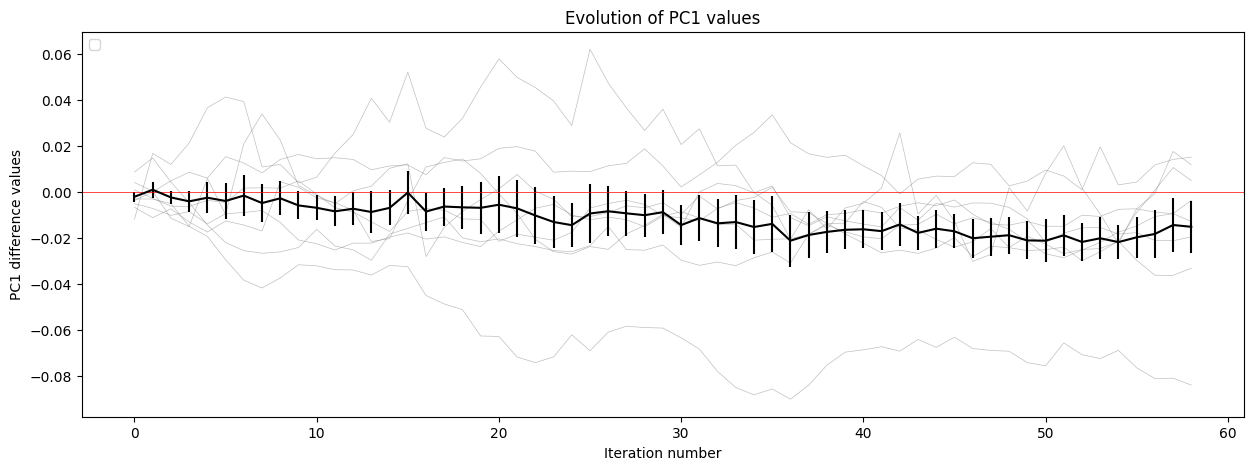

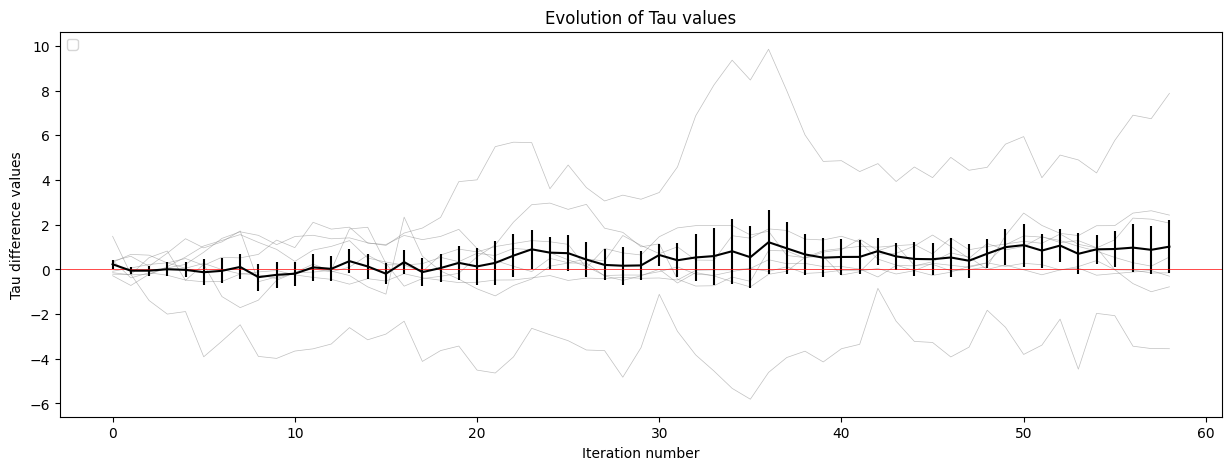

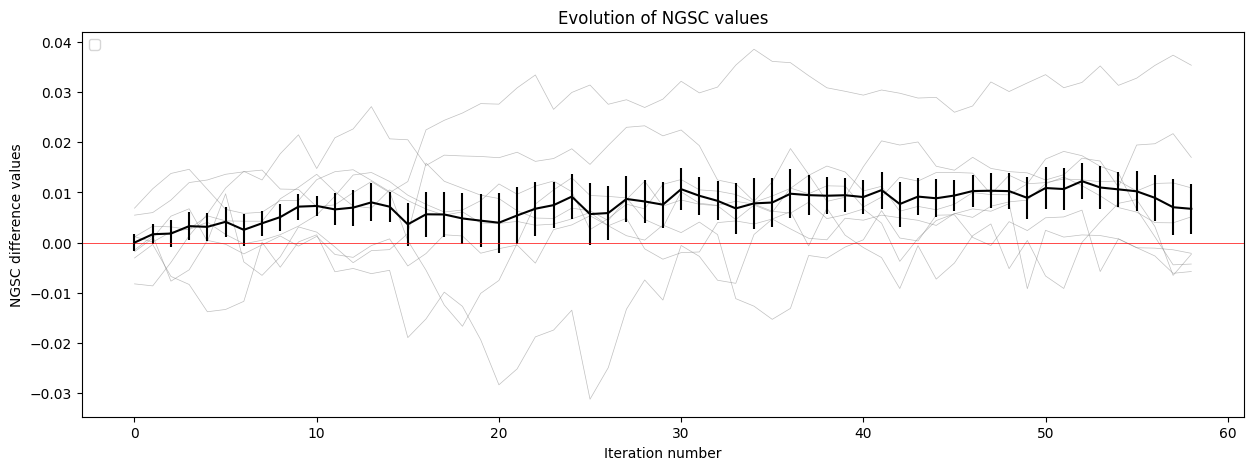

In [219]:
import numpy as np
import scipy.stats as stats

for measure in evolutions.keys():
    fig, ax = plt.subplots(figsize=(15,5)) 
    all_values = []  # store all session values for calculating mean and SEM
    for session in evolutions[measure].keys():
        session_values = evolutions[measure][session]
        all_values.append(session_values)
        ax.plot(session_values, color='gray', linewidth=0.5, alpha=0.5)  # plot individual session curves

    # turn list of lists into numpy array for easier calculations
    all_values_array = np.array(all_values)

    # calculate mean and SEM at each iteration  
    mean_values = np.nanmean(all_values_array, axis=0)
    sem_values = stats.sem(all_values_array, axis=0, nan_policy='omit')

    ax.errorbar(range(len(mean_values)), mean_values, yerr=sem_values, color='black', linewidth=1.5) # plot average curve
    ax.axhline(0, color='red', linewidth=0.5)  # Add thick horizontal line at y=0
    ax.legend(loc='upper left')
    ax.set_xlabel('Iteration number')
    ax.set_ylabel(f'{measure} difference values')
    ax.set_title(f'Evolution of {measure} values')
    plt.show()